# <img src="https://media.designrush.com/inspiration_images/134933/conversions/_1511456189_555_McDonald's-preview.jpg"   width="200px"  height="200px"  style="object-fit:cover"/>                         **Mcdonald's Menu Full Analysis**



# **Problem Statement and Background Information**

According to the National Health and Nutrition Examination Survey, over 40% of adults and almost 20% of children in the United States are classified as obese. Additionally, obesity rates exceeding 35% are reported in 19 states, marking an increase from 16 states just last year. A decade ago, no states had obesity rates surpassing 35%. Obesity is associated with numerous health conditions, including diabetes, heart disease, stroke, and various cancers such as breast and colorectal cancer. Moreover, the annual medical expenses attributed to obesity reached nearly $173 billion in 2019 alone (1).

These alarming statistics piqued my interest to undertake this project with the objective of leveraging Machine Learning to recommend healthier MacDonald’s food options for avid fast-food consumers, allowing them to make informed decisions when buying food. This is because many consumers unknowingly consume more calories and saturated fats than they require, thereby contributing to the prevalence of obesity and associated health complications. Thus with the recommendations, consumers can monitor their diets and reduce the risk of obesity-related diseases.

With the knowledge of the various tiers on each food and drink item, consumers would be educated on the nutritional value of each item. Consumers would be empowered to make well considered choices, pick items that would be better able to cater to their daily requirements and goals, ultimately combating obesity.



# Table of Contents
- [Problem Statement and Background Information](#problem-statement-and-background-information)

- [Introduction to dataset](#introduction-to-dataset)

- [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
  - [Food Items with zero nutrient values](#food-items-with-zero-nutrient-values)
  - [Food Items with extremely high nutrient values](#food-items-with-extremely-high-nutrient-values)
  - [Accuracy of calories given](#accuracy-of-calories-given)
  - [Conversion of imperial units to metric units](#conversion-of-imperial-units-to-metric-units)

- [Data Visualisation](#data-visualisation)
  - [Density of calories and macronutrients for each food item](#density-of-calories-and-macronutrients-for-each-food-item)
  - [Range of nutrients across the menu](#range-of-nutrients-across-the-menu)
  - [Range of calories by food category](#range-of-calories-by-food-category)
  - [Top 5 food items with highest or lowest nutrient across the whole menu](#top-5-food-items-with-highest-or-lowest-nutrient-across-the-whole-menu)
  - [Serving Size Problem](#serving-size-problem)
  - [Multicollinearity of variables](#multicollinearity-of-variables)
  
- [Feature Engineering](#feature-engineering)

- [Machine Learning](#machine-learning)
  - [Isolation Forest](#isolation-forest)
  - [Multivariate Linear Regression Model](#multivariate-linear-regression-model)
  - [Gradient Boosting Machine](#gradient-boosting-machine)

- [References](#references)

# Introduction to dataset
---
Jump to [Table of Contents](#table-of-contents)



In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set()
os.getcwd()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
menu_details = pd.read_csv("menu.csv")

## Let's look at what data does the dataset has, and what the data types are:



In [3]:
menu_details.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
print("Data dims : ", menu_details.shape)

Data dims :  (260, 24)


### As we can observe, there are 260 different food items of varying serving sizes in US Mcdonald's Menu.

In [5]:
menu_details.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

# **Data Cleaning and Manipulation**
---
Jump to [Table of Contents](#table-of-contents)

Let's check for the following:

> Food Items with zero nutrient values

> Food Items with extremely high nutrient values

> Accuracy of calories given

> Conversion of imperial units to metric units


### Food items with zero nutrient values
---
Jump to [Table of Contents](#table-of-contents)

> We have to exclude sub\-categories 'Beverages' & 'Coffee & Tea' as it includes Coke Zero, Coffee, Tea and water which has zero calories hence they are generally safe to consume.
>
> > It is still not advisable to drink these beverages in large amounts:
> >
> > > 1. Coke Zero \- While it has zero calories, it uses artificial sweeteners, such as aspartame and acesulfame potassium, that are not digested by the digestive system but still signals the brain of an influx of sugar, leading to elevated blood sugar levels when normal carbohydrate\-containing foods are consumed <span style='color:#f44336'>_**\(a\)**_</span> and other cascading effects that is synonymous with influx of normal fructose/sugar.
> >
> > > 2. Tea and Coffee \- contain caffeine, which is normally fine if ingested a safe amount. However, since caffeine has a half\-life of about 5 hours <span style='color:#f44336'>_**\(b\)**_</span>, timing of when the caffeine is ingested and the amount of caffeine can cause overdose and caffeine intoxication.
> >
> > ### Nutrients that matter : \['Calories', 'Total Fat', 'Sodium', 'Carbohydrates', 'Sugars', 'Protein'\] as these are the only nutrients that an ordinary person would care about, especially when looking at food labels



In [6]:
excluded_categories = ['Beverages', 'Coffee & Tea']

# Filter out the rows belonging to the excluded categories
menu_details_filtered = menu_details[~menu_details['Category'].isin(excluded_categories)]

# Assuming the rest of the setup is as previously described

column_names = ['Calories', 'Total Fat', 'Sodium', 'Carbohydrates', 'Sugars', 'Protein']
info_columns = ['Category', 'Item']

# Creating a boolean DataFrame for the filtered data
zero_mask_filtered = (menu_details_filtered[column_names] == 0)

# Including 'Category' and 'Item' for final output clarity
zero_mask_filtered[info_columns] = menu_details_filtered[info_columns]

# Filter for rows with at least one zero in specified columns
rows_with_zeros_filtered = zero_mask_filtered[column_names].any(axis=1)
filtered_zero_mask_filtered = zero_mask_filtered[rows_with_zeros_filtered]

# Melt to long format
melted_zero_mask_filtered = pd.melt(filtered_zero_mask_filtered, id_vars=info_columns, var_name='Nutrient', value_name='Has Zero Value')

# Filter to only show where 'Has Zero Value' is True
final_zero_values_df_filtered = melted_zero_mask_filtered[melted_zero_mask_filtered['Has Zero Value']]

# Display the results
final_zero_values_df_filtered.head(n=100)



,Category,Item,Nutrient,Has Zero Value
20,Snacks & Sides,Side Salad,Total Fat,True
21,Snacks & Sides,Apple Slices,Total Fat,True
32,Snacks & Sides,Apple Slices,Sodium,True
44,Breakfast,Hash Brown,Sugars,True
45,Chicken & Fish,Chicken McNuggets (4 piece),Sugars,True
46,Chicken & Fish,Chicken McNuggets (6 piece),Sugars,True
47,Chicken & Fish,Chicken McNuggets (10 piece),Sugars,True
48,Chicken & Fish,Chicken McNuggets (20 piece),Sugars,True
49,Snacks & Sides,Small French Fries,Sugars,True
50,Snacks & Sides,Medium French Fries,Sugars,True


## From this table, we can conclude:
> Apple Slices is a healthy snack/side as it has no fats and sodium even though it has no protein

> Chicken McNuggets, French Fries & Hash Brown have zero sugar (They tend to have high fats and are highly processed and also keep in mind that this is without any condiments)

> Side Salad has zero fats


    


## Food Items with extremely high nutrient values
---
Jump to [Table of Contents](#table-of-contents)

### Next, we will be identifying extremely high values. These are most likely unhealthy macro nutrients and possibly deadly if consumed daily for micronutrients.

> 36 grams of sugar for men and 25 grams of sugar for women is the recommended maximum grams of sugar one should consume in a day, let alone a meal. <span style='color:#f44336'>_**\(c\)**_</span>
>
> > Taking the average of two, it will be 30.5 grams



In [7]:
# Example thresholds for each column
thresholds = {
    'Total Fat (% Daily Value)': 100,
    'Saturated Fat (% Daily Value)': 100,
    'Cholesterol (% Daily Value)': 100,
    'Sodium (% Daily Value)': 100,
    'Carbohydrates (% Daily Value)': 100,
    'Dietary Fiber (% Daily Value)': 100,
    'Sugars': 30.5, #grams
    'Vitamin A (% Daily Value)': 100,
    'Vitamin C (% Daily Value)': 100,
    'Calcium (% Daily Value)': 100,
    'Iron (% Daily Value)': 100,
}



# Copy to avoid SettingWithCopyWarning while manipulating
menu_details_filtered = menu_details.copy()

# Initialize a DataFrame to store flags for high values
high_value_mask = pd.DataFrame(index=menu_details_filtered.index)

# Loop over each column and threshold, marking True where the value exceeds the threshold
for column, threshold in thresholds.items():
    high_value_mask[column] = menu_details_filtered[column] > threshold

# Include 'Category' and 'Item' for clarity in final output
high_value_mask['Category'] = menu_details_filtered['Category']
high_value_mask['Item'] = menu_details_filtered['Item']

# Melt to long format
melted_high_value_mask = pd.melt(high_value_mask, id_vars=['Category', 'Item'], var_name='Nutrient', value_name='Exceeds Threshold')

# Filter to only show where 'Exceeds Threshold' is True
final_high_values_df = melted_high_value_mask[melted_high_value_mask['Exceeds Threshold']]

# Display the results
final_high_values_df.head()


,Category,Item,Nutrient,Exceeds Threshold
82,Chicken & Fish,Chicken McNuggets (40 piece),Total Fat (% Daily Value),True
342,Chicken & Fish,Chicken McNuggets (40 piece),Saturated Fat (% Daily Value),True
491,Coffee & Tea,Frappé Chocolate Chip (Large),Saturated Fat (% Daily Value),True
513,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),Saturated Fat (% Daily Value),True
547,Breakfast,Big Breakfast (Regular Biscuit),Cholesterol (% Daily Value),True


In [8]:
count = len(final_high_values_df['Item'].unique())
print(count)

121


### Hence, 121 food items out of 260 hit the daily value of certain nutrients required \(not advisable to hit 100% in one meal\), which is roughly half of the menu.



## Accuracy of calories given
---
Jump to [Table of Contents](#table-of-contents)

### From general knowledge, we know that Carbohydrates, Protein and Fats, which make up the macronutrients(macros), are what contribute most to calorie counts.
> We will now check if the calorie values given in the dataset is correct by calculating Protein x 4, Carbohydrates x 4, and Total Fat x 9.

> the macros given are in grams and calories are in kcal, hence, the conversion above will be used

> we will then check the calculated calories against calories given in the dataset

In [9]:
menu_details['calculated calories'] = menu_details['Total Fat']*9 + menu_details['Protein']*4 + menu_details['Carbohydrates']*4
calorie_diff = menu_details[['Calories', 'calculated calories']]
calorie_diff.head(n=100)

,Calories,calculated calories
0,300,309.0
1,250,264.0
2,370,379.0
3,450,456.0
4,400,411.0
...,...,...
95,280,281.0
96,230,227.0
97,340,336.0
98,510,508.0


## We find that there is some discrepancy between the calories given and calculated calories. Below are some possible factors why.

### _1. Fibre Content_

_\- Dietary fibre is a type of carbohydrate that the body cannot digest. While most carbohydrates provide 4 calories per gram, not all fiber is fully fermented in the colon, and it contributes less than 4 calories per gram, sometimes counted as 2 calories per gram or not counted at all, depending on the regulatory guidelines of the country._

### _2. Sugar Alcohols_

_\- Products that contain sugar alcohols \(polyols\) like xylitol, sorbitol, and erythritol often use these as low\-calorie sweeteners. Sugar alcohols provide fewer calories than sugar—ranging from 0.2 to 3 calories per gram—and this can affect the total calorie calculation._

### _3. Fat Type_

_\- Not all fats contribute exactly 9 calories per gram. For instance, medium\-chain triglycerides \(found in coconut oil\) have a slightly lower calorie density. This can slightly affect calorie calculations, especially in products specifically formulated with these fats._

### _4. Rounding Rules_

_\- Food labels are subject to regulatory rounding rules for each macronutrient's reported value. For instance, if a product has 0.49 grams of fat, it might be rounded down to 0 grams on the label. These rounding rules can cause small discrepancies in the calculated vs. reported calorie content._

### _5. Protein Quality_

_\- The quality of protein, based on its digestibility and amino acid composition, can affect its caloric contribution. Some regulatory bodies adjust the calorie contribution of protein based on its quality, though this is less common._

### _6. Regulatory Differences_

_\- Different countries have various methods for calculating and rounding the values on food labels, which can lead to inconsistencies. For example, the EU and the US have different regulations regarding calorie calculation and labeling._



## Conversion of imperial units to metric units
---
Jump to [Table of Contents](#table-of-contents)

> Before that, the serving sizes are mixed between imperial and metric units

> Thus, let's clean the data by extracting metric units wherever possible else convert the imperial units into metric (e.g. fl oz to ml) to ensure uniformity



In [10]:
# Regular expression to extract numbers and units
extracted = menu_details['Serving Size'].str.extract(
    r'(\d+(?:\.\d+)?)\s*(g|ml|fl oz)')

# Convert extracted numbers to numeric
extracted[0] = pd.to_numeric(extracted[0], errors='coerce')


# Define a function to convert fl oz to ml and standardize units
def convert_and_standardize_units(row):
    number, unit = row[0], row[1]
    if unit == 'fl oz':
        return pd.Series([number * 29.5735,
                          'ml'])  # Conversion factor from fl oz to ml
    elif unit == 'g':
        return pd.Series([number, 'g'])  # Keep as grams
    else:  # For 'ml', or any other case you may have considered as 'ml'
        return pd.Series([number, 'ml'])


# Apply the conversion and unit standardization function
menu_details[['Serving Size Cleaned',
              'Unit']] = extracted.apply(convert_and_standardize_units, axis=1)

# Display the DataFrame to verify the results
menu_details[['Serving Size', 'Serving Size Cleaned', 'Unit']].head(n=264)

,Serving Size,Serving Size Cleaned,Unit
0,4.8 oz (136 g),136.0,g
1,4.8 oz (135 g),135.0,g
2,3.9 oz (111 g),111.0,g
3,5.7 oz (161 g),161.0,g
4,5.7 oz (161 g),161.0,g
...,...,...,...
255,10.1 oz (285 g),285.0,g
256,13.4 oz (381 g),381.0,g
257,6.7 oz (190 g),190.0,g
258,14.2 oz (403 g),403.0,g


# **Data Visualisation**
---
Jump to [Table of Contents](#table-of-contents)

> Density of calories and macronutrients for each food item

> Range of nutrients across the menu

> Range of calories by food category

> Top 5 food items with highest or lowest nutrient across the whole menu

> Serving Size problem

> Multicollinearity of variables



## Density of calories and macronutrients for each food item
---
Jump to [Table of Contents](#table-of-contents)

### Let's create a function called densityfinder to help us do the calculation and visualisation of calories and all the macros and its density, which calculated by the values divided by the cleaned serving size data.

> What is the purpose of finding different macros density and not just use calorie density?
>> This is to let people make informed decision based on their diet and health goals. For example, a person who is on a clean bulk, would prefer a highly protein dense meal while a person who wants to carb load while minimising calories, can do so by looking at which food has high carb density.

In [11]:
# Function to find calorie and macro's density

def densityfinder(var):

    menu_details[f'{var} Density'] = menu_details[var] / menu_details[
        'Serving Size Cleaned']

    # Calculate Average calorie density by Category
    avg_density = menu_details.groupby('Category')[f'{var} Density'].mean()

    # Calculate Maximum Calorie Density by Category
    max_density = menu_details.groupby('Category')[f'{var} Density'].max()

    # Calculate Minimum Calorie Density by Category
    min_density = menu_details.groupby('Category')[f'{var} Density'].min()

    # Plotting the Average Calorie Density
    ax = avg_density.plot(kind='bar',
                          figsize=(10, 6),
                          color='skyblue',
                          alpha=0.75)

    # Adding some labels and title
    plt.xlabel('Category')
    plt.ylabel(f'Average {var} Density')
    plt.title(f'Average {var} Density by Category')
    plt.xticks(rotation=45)  # Rotate category names for better visibility

    # Iterating over the bars and adding labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.show()

    # Combine into a DataFrame
    density_comparison = pd.DataFrame({
        f'Max {var} Density': max_density,
        f'Min {var} Density': min_density
    })

    # Reset index if 'Category' is not already a column
    density_comparison.reset_index(inplace=True)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Width of a bar
    width = 0.35

    # Positions of the left bar-boundaries
    ind = np.arange(len(density_comparison['Category']))

    # Positions of the right bar-boundaries
    ind2 = [x + width for x in ind]

    # Plotting Max Calorie Density
    bars1 = ax.bar(ind,
                   density_comparison[f'Max {var} Density'],
                   width,
                   label=f'Max {var} Density',
                   color='red')

    # Plotting Min Calorie Density
    bars2 = ax.bar(ind2,
                   density_comparison[f'Min {var} Density'],
                   width,
                   label=f'Min {var} Density',
                   color='green')

    # Adding some labels and title
    ax.set_xlabel('Category')
    ax.set_ylabel(f'{var} Density')
    ax.set_title(f'Max vs. Min {var} Density by Category')
    ax.set_xticks([x + width / 2 for x in ind])
    ax.set_xticklabels(density_comparison['Category'], rotation=45)
    ax.legend()

    # Function to add labels above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(
                f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center',
                va='bottom')

    # Adding labels above both sets of bars
    add_labels(bars1)
    add_labels(bars2)

    # Display the plot
    plt.show()

## Calories Density

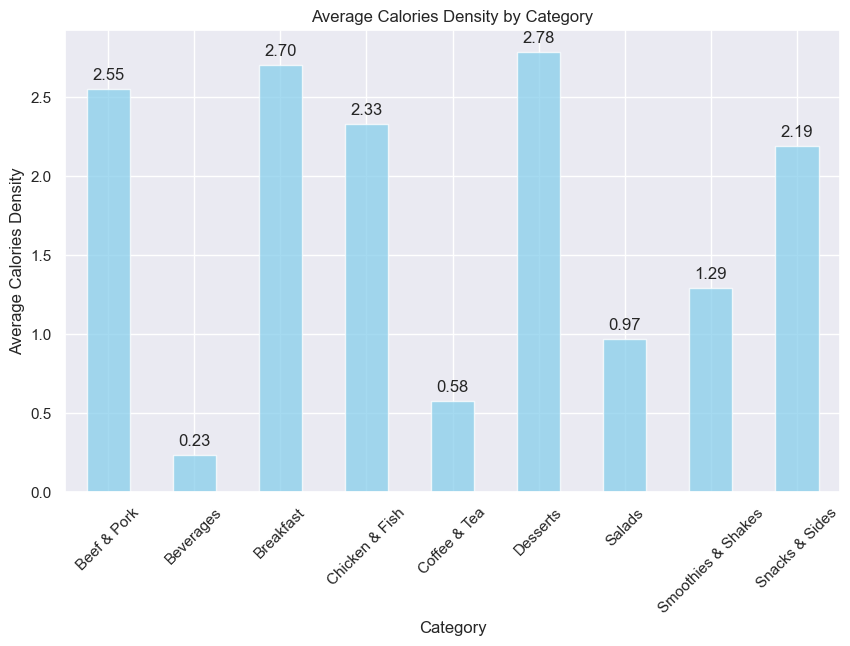

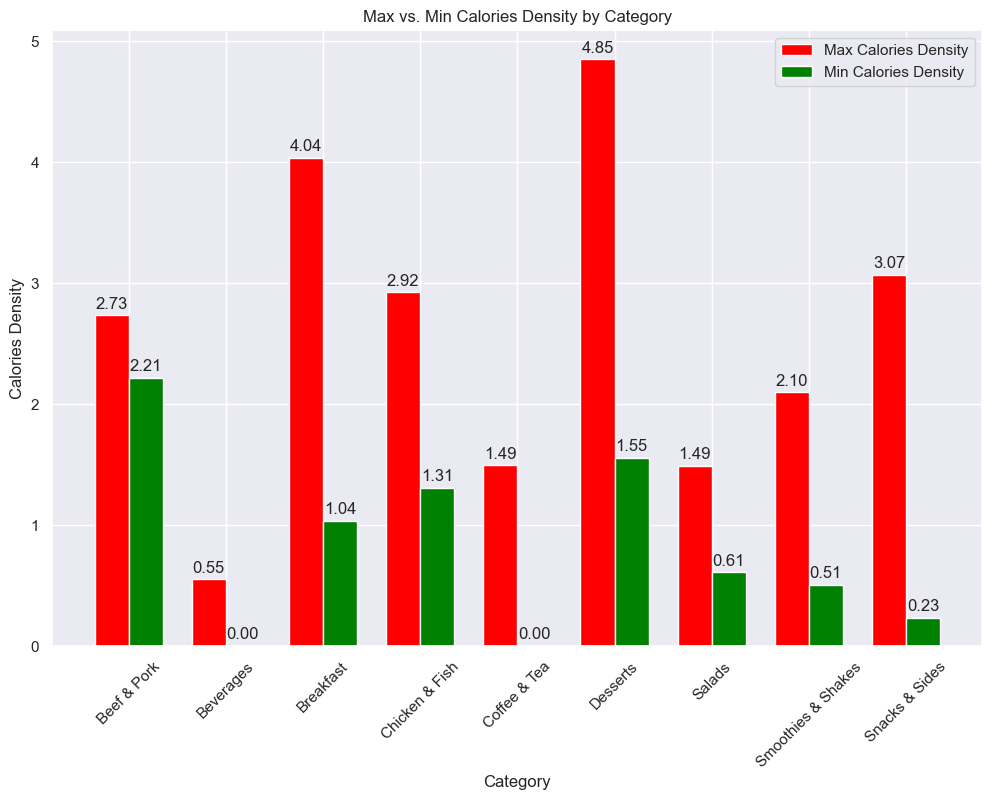

In [12]:
densityfinder('Calories')

Desserts have the highest calorie density, followed by Breakfast and then Beef & Pork. Desserts have a high variance, followed by Breakfast and then Beef & Pork. This means, in general, when a customer chooses Beef & Pork, there is a high chance that the food item contains lots of calories but should a customer choose Desserts, there is small chance that the food item has even more calories than the Beef & Pork option.


## Macronutrients' density

It is up to customer's lifestyle, goal and diet to choose whether they want a protein, carbohydrate or fat dense food item


## Protein Density

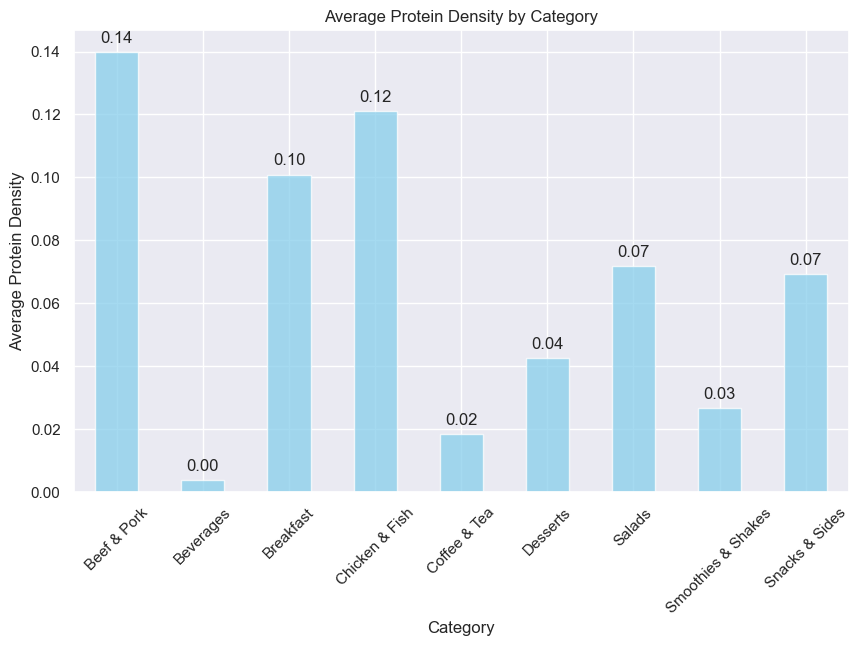

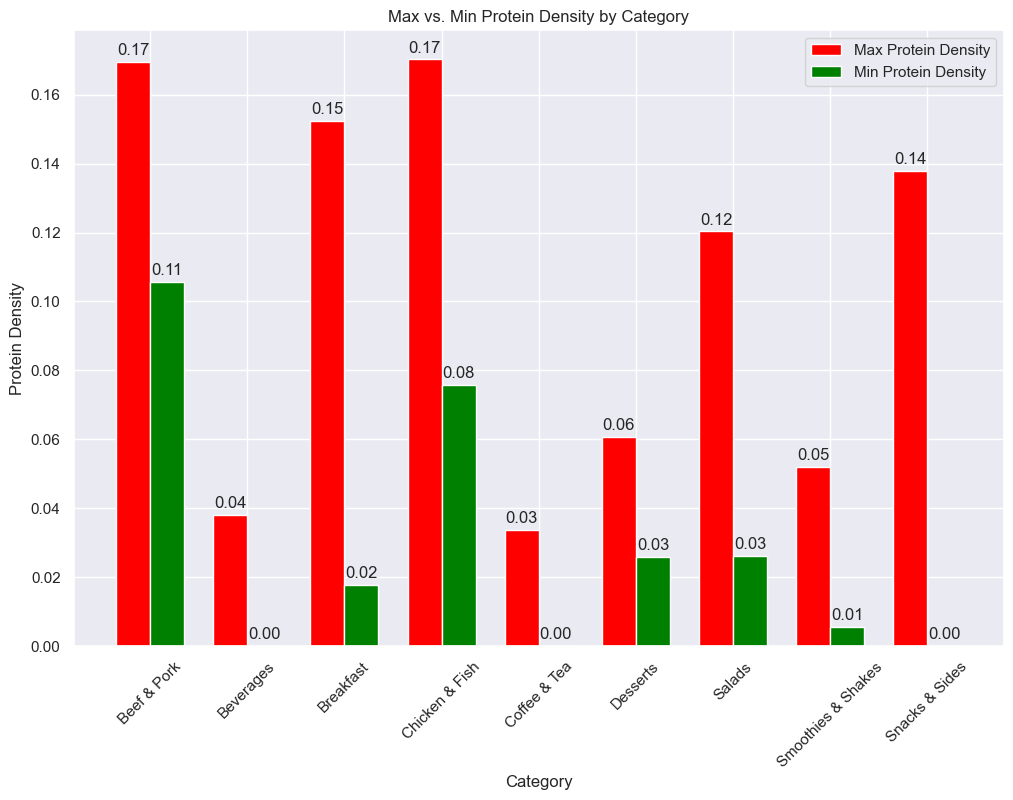

In [13]:
densityfinder('Protein')

## Carbohydrates Density

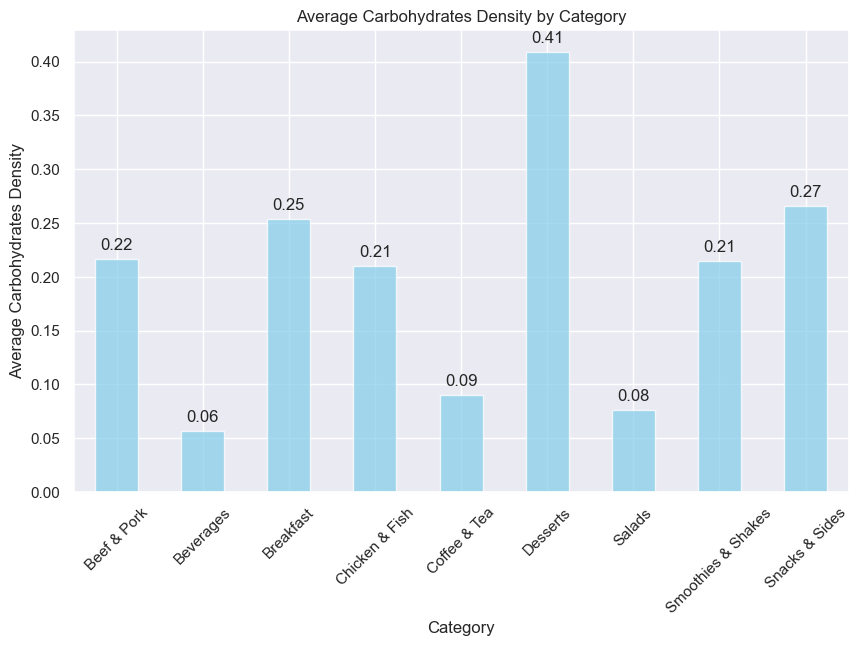

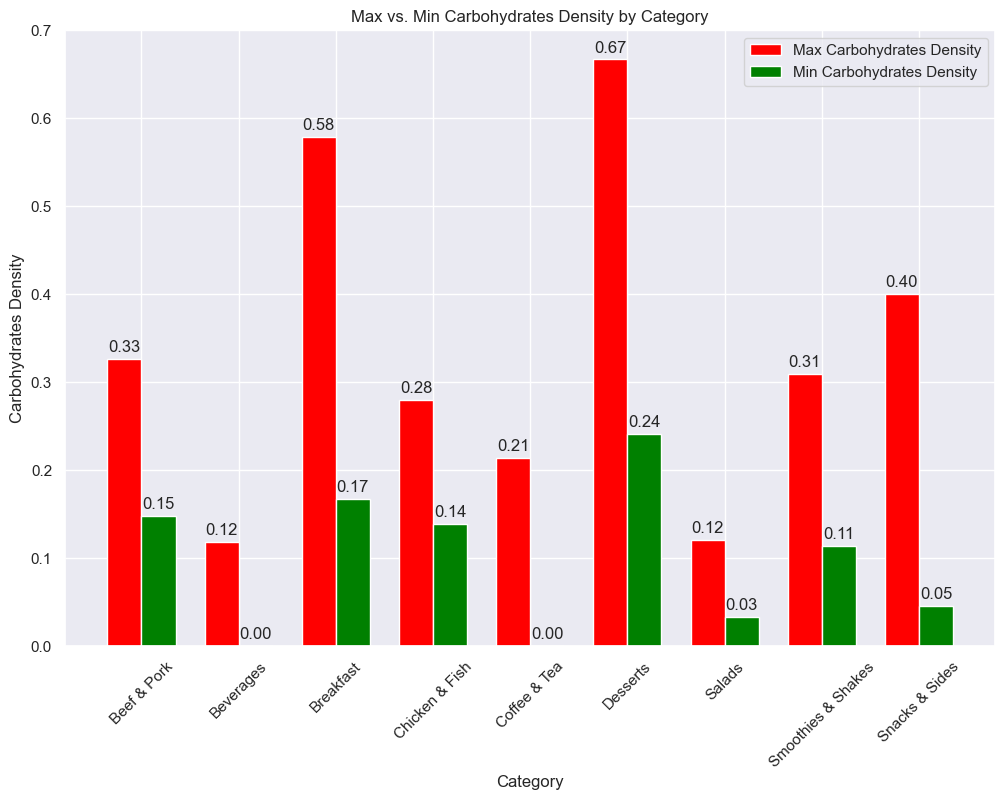

In [14]:
densityfinder('Carbohydrates')

## Total Fat Density

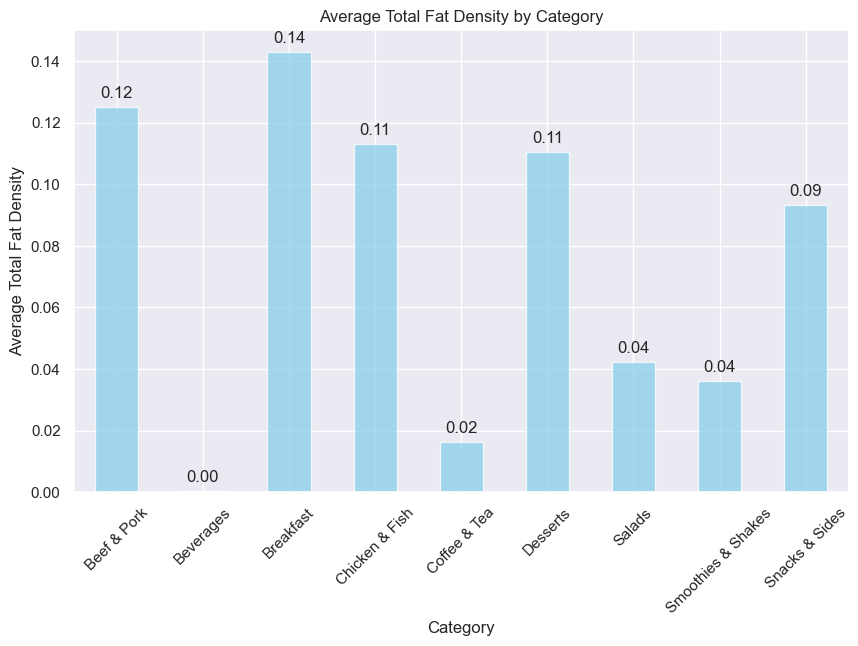

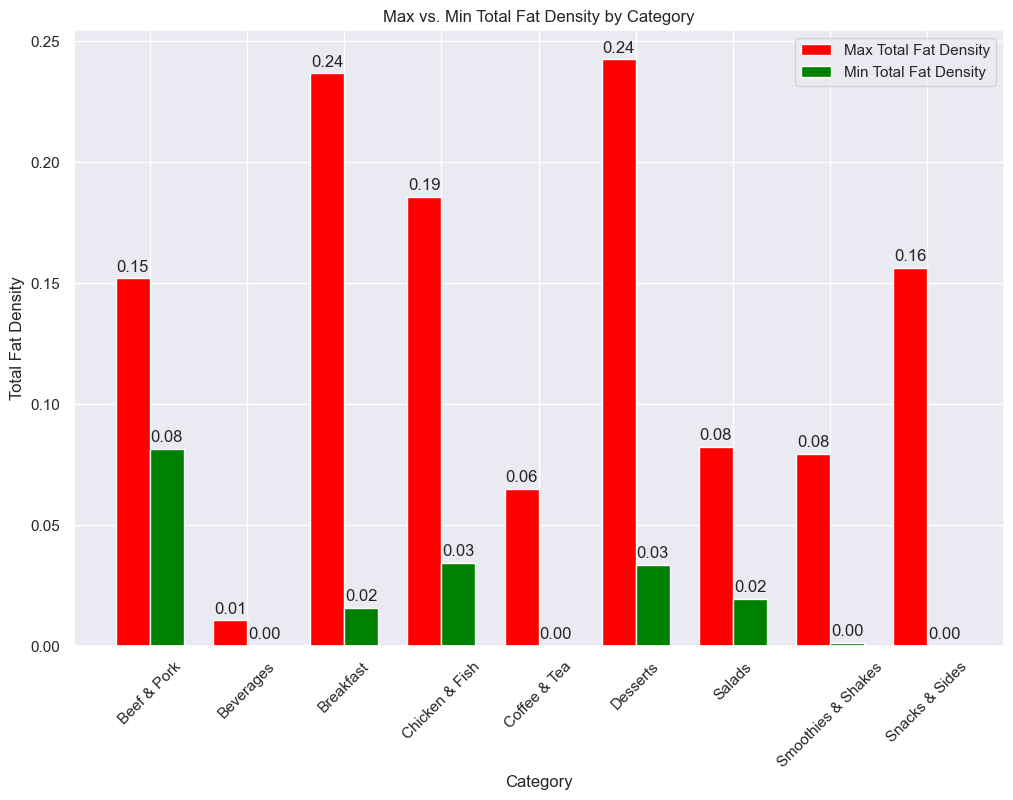

In [15]:
densityfinder('Total Fat')

## We will now be utilising Plotly to better visualise the nutritional content of the menu items and rank, using a bar chart, items that contain the highest and lowest amounts of each nutrient.

## Range of nutrients across the menu
---
Jump to [Table of Contents](#table-of-contents)

In [16]:
menu_details['Trans Fat (% Daily Value)'] = (menu_details['Trans Fat']/2.2)*100
menu_details['Protein (% Daily Value)'] = (menu_details['Protein']/50)*100
menu_details['Sugars (% Daily Value)'] = (menu_details['Sugars']/50)*100

In [17]:
nutrients = [

    'Carbohydrates (% Daily Value)',
    'Protein (% Daily Value)',
    'Sodium (% Daily Value)',
    'Trans Fat (% Daily Value)',
    'Sugars (% Daily Value)',
    'Saturated Fat (% Daily Value)',
    'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)',
    'Dietary Fiber (% Daily Value)',
    'Iron (% Daily Value)',
    'Cholesterol (% Daily Value)',
    'Calcium (% Daily Value)',

]

In [18]:
long_df = pd.melt(menu_details, id_vars=['Category'], value_vars=nutrients, var_name='Nutrient', value_name='Value')

# Create a box plot
fig = px.box(long_df, x='Nutrient', y='Value', color='Nutrient', title='Range of each Nutrient Across the Menu')

# Update layout
fig.update_layout(yaxis_title='Value', xaxis_title='Nutrient', boxmode='group')
fig.update_traces(marker=dict(size=4),
                  selector=dict(type='box'))

# Show plot
fig.show()

As we can tell from above, many of the items on the menu contain high amounts of Sugars, Saturated Fats and proteins as the median values for these categories are relatively high, nearing 25% and above for a single food or drink item. The upper fence for Sugars and Saturated Fats exceeds 100% of the daily recommended value as well. Given that many Mcdonald's goers often order a set meal, it is highly likely for consumers to exceed their daily recommended intake for various nutrients in one sitting which may lead to several adverse effects on health on top of contributing to obesity.

With our research, the high amounts of these nutrients in the menu items would be made known to consumers, allowing consumers to make better choices when forming their meals with their the daily percentage of each nutrient in mind, or avoid getting a meal altogether if it causes them to exceed the recommended daily intake of either of the nutrients. Now, let's take a look at the range of calories for each food category.

## Range of calories by food category
---
Jump to [Table of Contents](#table-of-contents)



In [19]:
calories_range_by_category = menu_details.groupby('Category')['Calories'].agg(['min', 'max'])

#Box plot for range of calories across the food categories
fig = px.box(menu_details, x='Category', y='Calories', title='Range of Calories by Food Category')
fig.show()

According to Washington State Department of Social and Health Services, the calories for food and drinks items across the menu are considered high as most of the food items along with the Smoothies & Shakes have median values of more than 400 calories (2). Considering that many customers get a set meal instead of just a la carte, and that the data does not take into account sauces or syrups customers may add, they may easily exceed their daily recommended calorie intake in actual fact and this would directly impact their risk of obesity.

At the same time, we can observe that the category 'Smoothies & Shakes' has the highest median calories value of 540. Thus, in this case, getting a smoothie or shake on top of other food items or getting more than one in a day would be highly discouraged and the calories present would be made known to the consumer.

Thus, we intend to use our research to make consumers more aware of their caloric intake while dining at Mcdonald's and make more informed decisions when choosing the food, drinks or dessert items, opting to forgo certain items if needed to reduce the prevalence of obesity and related illnesses.

## Top 5 food items with highest or lowest nutrient across the whole menu
---
Jump to [Table of Contents](#table-of-contents)

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

figures = []

for nutrient in nutrients:
    # Sort the menu items based on the nutrient content, and select the top 5 highest
    top_5_highest = menu_details.nlargest(5, nutrient, keep='all')

    # Similarly, select the top 5 lowest, excluding zeros for a more meaningful comparison
    top_5_lowest = menu_details[menu_details[nutrient] > 0].nsmallest(5, nutrient, keep='all')

    # Create subplots: one row with two columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"<b>Top 5 Highest in {nutrient}</b>", f"<b>Top 5 Lowest in {nutrient}</b>"))

    # Add bar for the top 5 highest values
    fig.add_trace(go.Bar(x=top_5_highest[nutrient], y=top_5_highest['Item'], orientation='h', name='Highest'), row=1, col=1)

    # Add bar for the top 5 lowest values
    fig.add_trace(go.Bar(x=top_5_lowest[nutrient], y=top_5_lowest['Item'], orientation='h', name='Lowest'), row=1, col=2)

    # Update layout for readability
    fig.update_layout(height=500, width=1350, title_text=f"Top 5 Highest and Lowest {nutrient} Items", showlegend=False,
                      yaxis_title=nutrient)

    # Update subplot titles to wrap every 5 words
    fig.update_annotations(subtitle_text=[f"<b>Top 5 Highest in {nutrient}</b><br>" + "<br>".join(subtitle.split()) for subtitle in fig.layout.annotations[0]['text'].split("<br>")],
                           row=1, col=1)
    fig.update_annotations(subtitle_text=[f"<b>Top 5 Lowest in {nutrient}</b><br>" + "<br>".join(subtitle.split()) for subtitle in fig.layout.annotations[1]['text'].split("<br>")],
                           row=1, col=2)

    # Append the figure to the figures list
    figures.append(fig)

# Display each figure
for fig in figures:
    fig.show()

Thus, using the graphs above, we can see what foods or drinks contain the highest or lowest in each of the nutrients. This would allow consumers to pick their meals while taking into consideration their specific dietary requirements. For people lacking a certain nutrient, they can use the graphs to choose which foods or drinks to purchase and, likewise, people can choose which food or drinks to avoid when they have too much of a certain type of nutrient. For an individual combating obesity, they can choose to cut down on foods or drinks containing high saturated fats, for example, as it is strongly linked to high calorie count as we will see later on. This would contribute greatly to fats gain and the risk of obesity.

At the same time, the large serving sizes in American McDonalds's may prove to be a real problem as well. Below, we will explore further on the relation of portion sizes to the nutritional intake, to caloric intake, and ultimately to the risk of obesity.

## **Serving Size Problem**
---
Jump to [Table of Contents](#table-of-contents)

> Calories and macronutrients may or may not vary proportionally to the change in serving size. Identifying them helps to let customers make informed choice as to whether it is worth to get a different serving size or upsizing their meal.
>
> > Using Japan's Mcdonald's as comparison, it can be seen that the Japanese serving size are much smaller than the American, which is a contributing factor to obesity too.
> >
> > Below we will be investigating the relation of calories to serving size across the various food and drink categories. We will start off by taking the serving sizes for the different categories and plot them against Calories to see the overall trend.



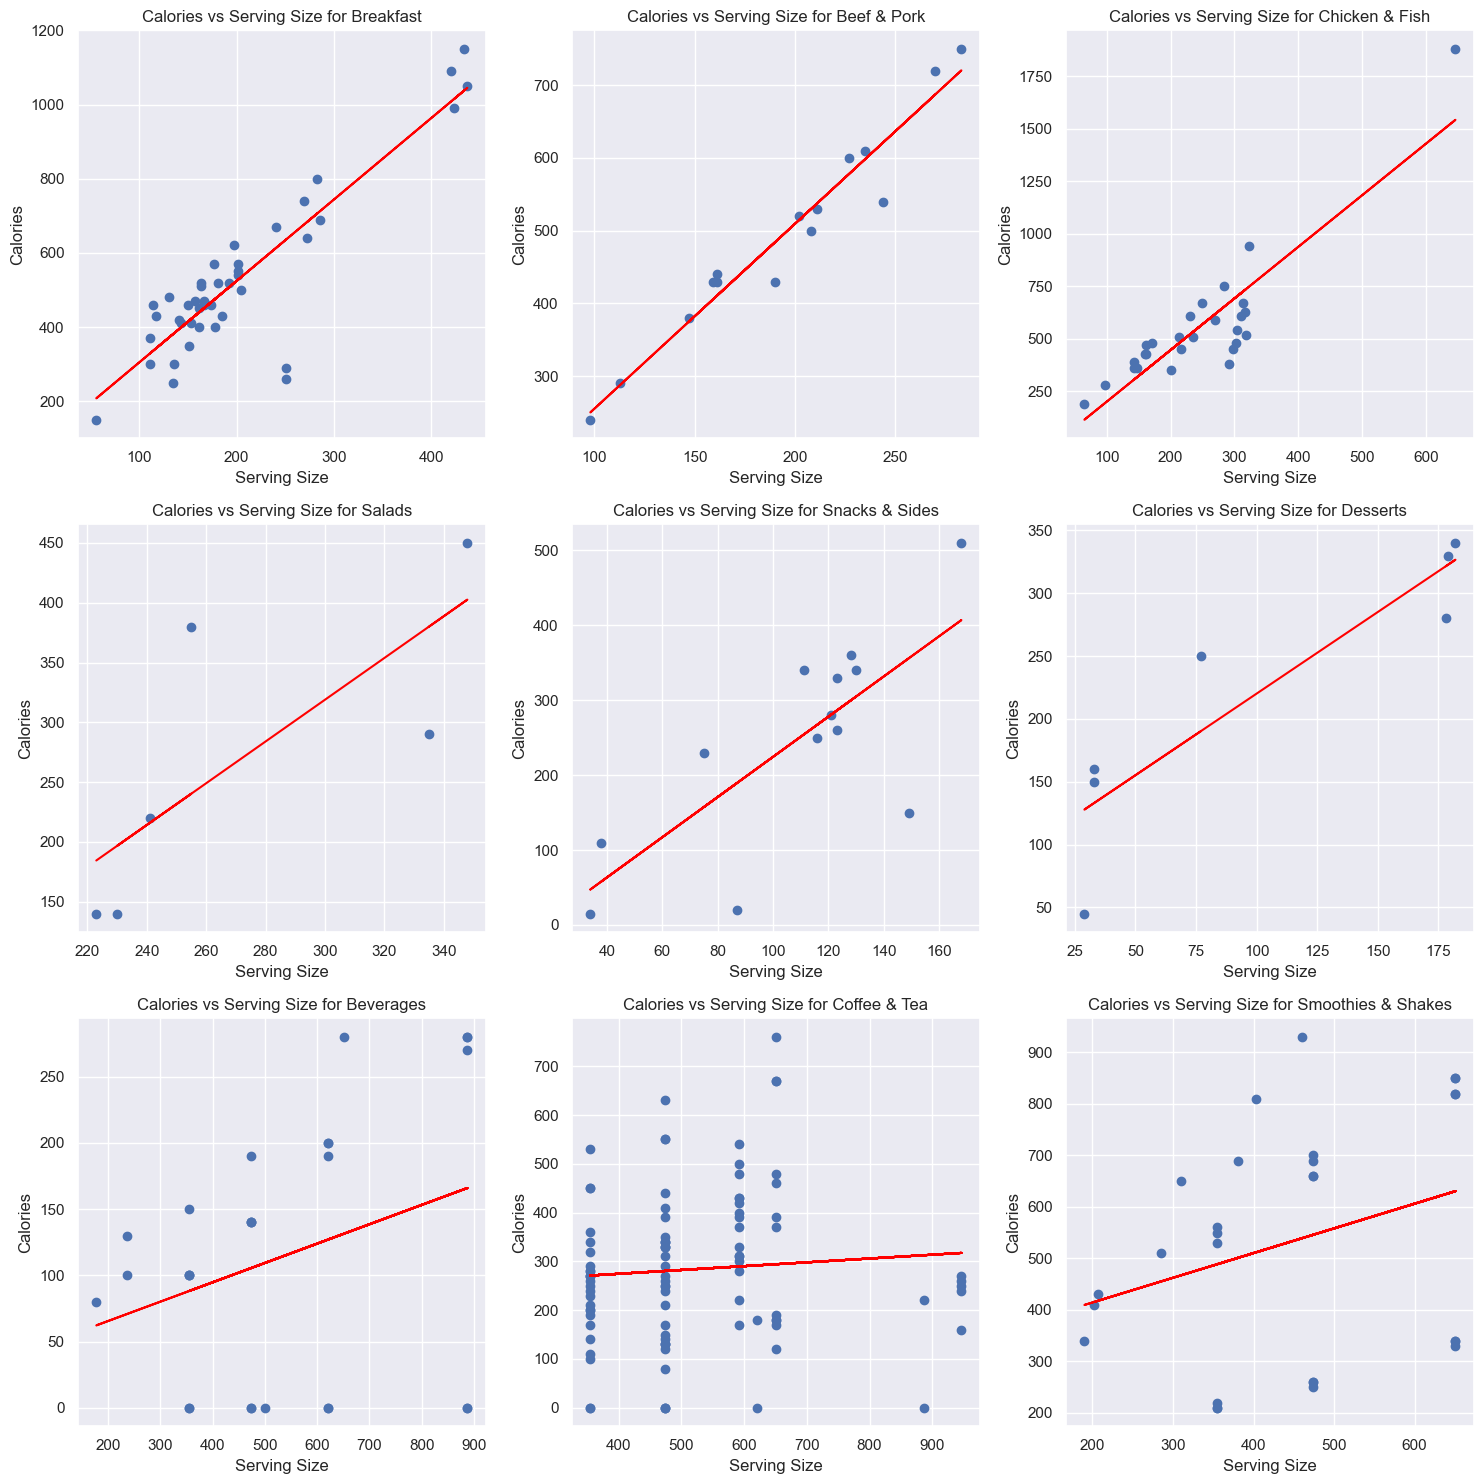

In [21]:
from scipy import stats

# Get unique categories of food
categories = menu_details['Category'].unique()

# Define the layout for the subplots
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot scatter diagrams for each category
for i, category in enumerate(categories):
    # Filter dataframe for the current category
    menu_details_category = menu_details[menu_details['Category'] == category]

    x = np.array(menu_details_category['Serving Size Cleaned'])
    y = np.array(menu_details_category['Calories'])

    # Perform linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def myfunc(x):
        return slope * x + intercept

    mymodel = myfunc(x)

    # Plotting Calories against serving size for the current category
    # Plot the data and the linear regression line
    axes[i].scatter(x, y)
    axes[i].plot(x, mymodel, color='red')
    axes[i].set_xlabel('Serving Size')
    axes[i].set_ylabel('Calories')
    axes[i].set_title(f'Calories vs Serving Size for {category}')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Thus, from the various graphs presented above we can confirm that generally, it's evident that there's a positive linear relationship between Calories and Serving Sizes across all categories, as indicated by the positive gradients of the linear regression lines. This suggests that larger serving sizes are associated with higher calorie counts. However, for certain food categories such as Breakfast, Beef and Pork and Chicken and Fish, the steeper gradients reveal a disproportionate increase in calories relative to serving size, because the increase in calories is higher than expected based on the increase in serving size. This implies that upsizing may lead to a significant rise in calorie intake, particularly for these categories. Thus, consumers should exercise caution and consider avoiding upsizing for certain food categories to manage their calorie consumption effectively.

Our previous research showed that calorie intake directly affects the risk of obesity and related diseases, we would thus hypothesise that larger serving sizes would lead to higher rates of obesity and related illnesses. To confirm this hypothesis, we have 2 countries as a case study - Japan and America. Firstly, there are free refills for drinks in almost all Mcdonald's in America (3), which is not the case for Japan. On top of that, the food and drink serving sizes are considerably bigger for the Small, Medium and Large sizes in America than it is in Japan (4 & 5). Hence, we can tell that fast-food consumers in America are accustomed to consuming larger portion sizes as compared to their Japanese counterparts. From the visualisation above, we can tell that this would lead to higher daily caloric intake for Americans and, hence, higher risk of obesity. And from our research, 40% of adults in America are obese (1) while only less than 4% of adults in Japan are obese(more than or equal to BMI of 30) (6). Therefore, this strongly supports the hypothesis that portion sizes is directly proportional to obesity rates.

However, there are certain foods in the categories where calories does not increase proportionately with serving size. This is represented by the outliers present in the graphs.

Some exceptions include:

1. In the graph for breakfast, despite serving size being more than 250g, there were 2 food items with less than 300kcal. These are the oatmeal bowls.
2. In the graph for Chicken & Fish, there were many datapoints with serving size of around 300g but some were lower in calories than others, This is due to difference in calories between crispy chicken and grilled chicken in the Mcwrap.
3. In the graph for Beverages, there are consistently values at 0 calories as serving size increases as they are diet drinks and water which contain no calories.
4. In the Coffee & Tea graph, we can tell that the caloric content differ greatly despite having the same serving size, this is because the different types of drinks of the same size contained varying amounts of calories. Drinks with Non fat milk and Sugar Free French Vanilla Syrup had considerably lower calories.

Hence, we can tell that there exists certain type of foods that are large in serving size but low in calories(low calorie density), these food options would be identified as better for obesity prevention and possibly healthier options as we will explore further down below. Such healthier options may also be recommended to upsize since calorie density is low but it is high in other essential nutrients, and consumers would be advised to switch to healthier alternatives.

Thus, with the information that the larger serving sizes of certain types of food or drinks can lead to higher caloric amount in individuals' diet, we can advise consumers on whether or not to upsize and how it affects their daily caloric needs. Thus, this would raise awareness on healthier options, prevent individuals from ordering excessive amounts of calories for themselves unknowingly and reconsider before upsizing.



## Multicollinearity of variables
---
Jump to [Table of Contents](#table-of-contents)

The Variance Inflation Factor (VIF) is a measure used to quantify the severity of multicollinearity in regression analysis. Specifically, the VIF measures how much the variance of these estimated regression coefficients increases when predictors (nutritional variables) are correlated with each other. If no factors are correlated, the VIFs will all be 1.

Let's first calculate VIF values:


In [22]:
col_of_int = nutrients + ['Calories']
menu_col_int = menu_details[col_of_int]

# Convert columns to numeric data types
menu_col_int = menu_col_int.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
menu_col_int.dropna(inplace=True)

# Add constant to the features
X = add_constant(menu_col_int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                          Feature        VIF
0                           const   5.143065
1   Carbohydrates (% Daily Value)  57.087538
2         Protein (% Daily Value)  26.399385
3          Sodium (% Daily Value)  24.647365
4       Trans Fat (% Daily Value)   2.998000
5          Sugars (% Daily Value)  27.124504
6   Saturated Fat (% Daily Value)  12.744546
7       Vitamin A (% Daily Value)   1.427583
8       Vitamin C (% Daily Value)   1.200039
9   Dietary Fiber (% Daily Value)   3.990219
10           Iron (% Daily Value)   8.455376
11    Cholesterol (% Daily Value)   2.308990
12        Calcium (% Daily Value)   4.529920
13                       Calories  71.524334


## Let's visualise these VIF values on a bar graph:

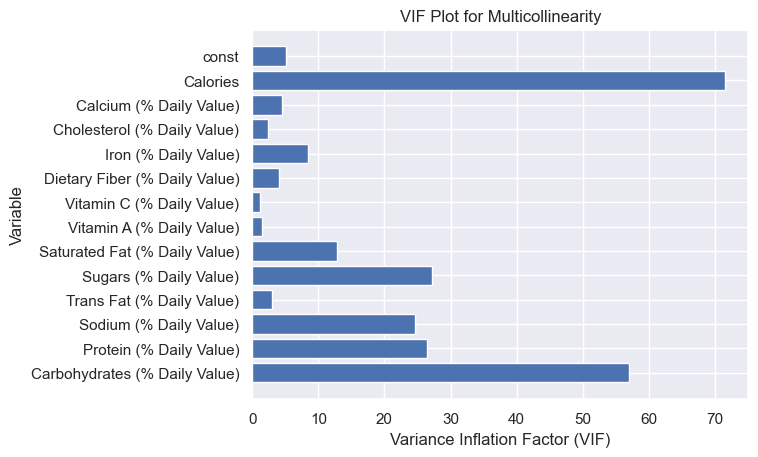

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = menu_col_int.assign(const=1)
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Plot VIF
plt.barh(vif["Variable"], vif["VIF"])
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Variable')
plt.title('VIF Plot for Multicollinearity')
plt.show()

From above, we can tell that Calories followed by carbohydrates have the highest VIF values. This is followed by sugars and protein as well even though values are much lower. This shows that Calories and carbohydrates are highly related to other nutrients present in the food and drinks from Mcdonald's. One possible reason may be because foods high in carbohydrates are very calorie dense as well and food or drinks from McDonald's that have high amount of carbohydrates tend to have high amounts of sugar as well, such as the shakes or desserts as seen in the top 5 of each nutrients graph above.

Let's explore further and confirm the relationships between the various nutrients, especially that of Calories, using a Heat map.

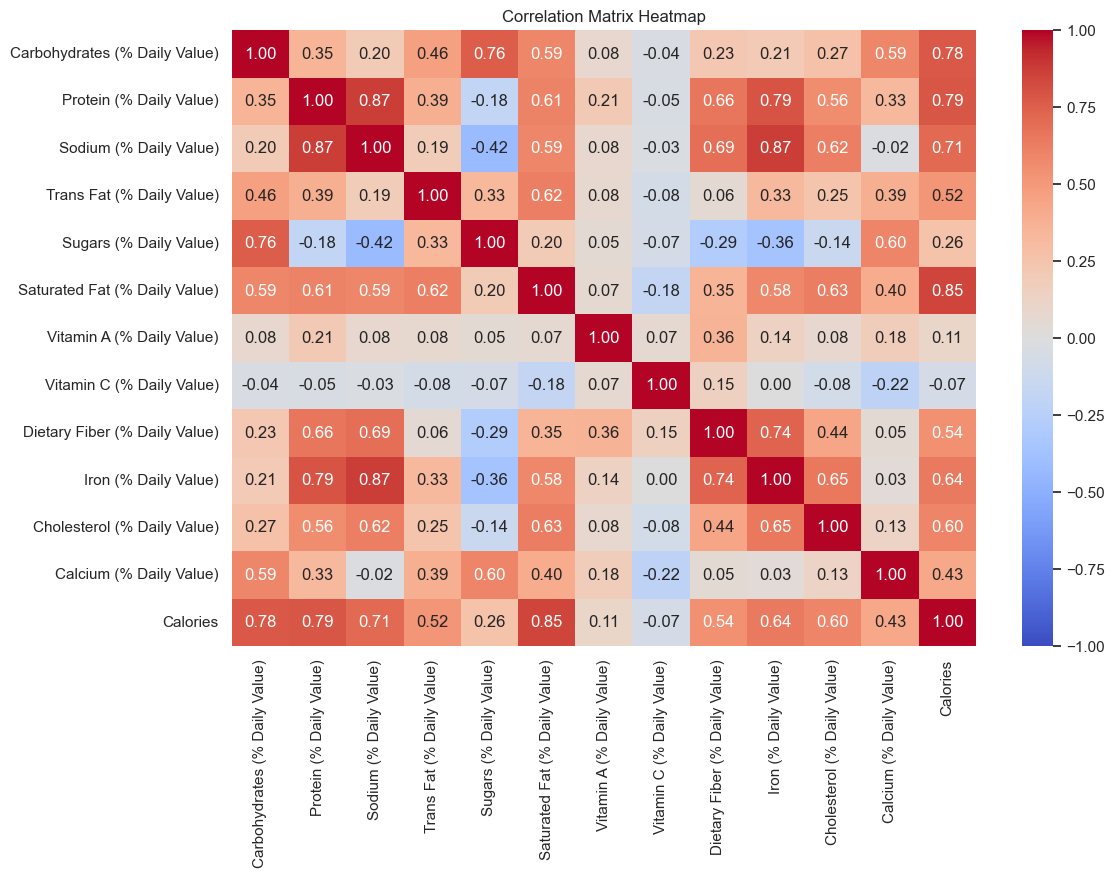

In [24]:
correlation_matrix = menu_col_int.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In general, higher colour intensity indicates higher strength of the correlation between variables. When variables have high positive correlations (close to 1), it would mean they have strong direct relationships and when they have high negative correlations (close to -1) it would mean they have strong inverse relationships. Variables having many strong correlations may indicate multicollinearity.

From the heat map above, we can indeed tell that Calories is highly linked to other nutrients.

From the first row, the row showing relation of 'Calories' to the rest of the factors, we can tell that Saturated fats, proteins and carbohydrates have the highest correlation of 0.85, 0.79 and 0.78 respectively. This is consistent with the facts previously established as fats, proteins and carbohydrates are the biggest contributors to amount of calories present since each gram contains their respective amounts of calories. Thus, they have strong linear relationships with caloric content in the food and drink items.

Other nutrients including Iron and Dietary fibre have moderate correlation to calories, with values of 0.64 and 0.54 respectively. Additionally, we can tell that Calcium, Sugars and Vitamin A have weak correlation to Calories, with values 0.43, 0.26 and 0.11 accordingly. This is because, generally, food containing more of such nutrients are food containing more fats, protein and carbohydrates. Hence, they are associated with higher caloric values, however, the contribution to calories from these nutrients are much less. Therefore, they still have a positive linear relationship with caloric content but a weak one.

Lastly, we can also see that Vitamin C has a negative correlation with calories with value -0.07. This is because, generally, Mcdonald's foods that are higher in vitamin c are lower in calories. One notable example would be the apple slices sold in McDonald's which are high in vitamin C but low in calories.

From this information, recommendations can be made to people struggling with obesity-related challenges to cut down on the intake of foods or drinks high in saturated fats, proteins and carbohydrates so as to cut down on calorie intake and risk of obesity.

We can also tell Protein and sodium are highly positively related. This is likely due to most burgers and other meat options being seasoned with a lot of salt, leading to high sodium content.
Sodium also has high collinearity with iron. Options with high iron include red meats and poultry, as explained above, such options are often high in sodium.

Sodium and sugar have the largest negative correlation of -0.42. This may be because items generally contain high amounts of either sugar or salts, due to clash of flavours when both are added.

Sodium and calcium have a very weak correlation of near 0, thus, are largely unrelated. This may be due to both items high in sodium such as Quarter pounders, and low in sodium, such as McFlurry having high calcium content.

# **Feature Engineering**

---

Jump to [Table of Contents](#table-of-contents)

## Composite Score to determine healthiness

> The weights used in the weighted sum is backed up by research and science. Comparing with other variables, the weights indicate the level of impact that variable has on one's health and subsequently their trajectory towards obesity. While the weights might not be 100% accurate, as there is no specific mix of nutrient values that determines the true healthiness of a food item,assigning a composite score helps to train the AI models to distinguish which variables should be given a higher pseudo 'weight', as it analyses what determines a higher composite score.

> The higher the composite score, the healthier the food item is.

> Do note this composite score may not be ideal for all individuals as a food item with high composite score might have very high nutrient density but low in calories, which wouldn't be feasible or practical to eat in large amounts.

> This healthiness composite score is a mere indicator of what food item is safe to consume consistently, especially should one consume it on a daily basis.



| Nutrient | Details |
| :------------------------------------------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| <span style='color:#9f0500'>Carbohydrates</span> | <span style='color:#9f0500'>While it is safe to eat these food in small amounts, with every increase of amount, the health risks do increase dramatically. Hence if the %DV is beyond 100%, the score will be deducted to indicate a more harsh, competitive and rigorous composite score.</span> |
| <span style='color:#9f0500'>Trans Fats</span> | <span style='color:#9f0500'>\(Content similar to Carbohydrates\)</span> |
| <span style='color:#9f0500'>Saturated Fats</span> | <span style='color:#9f0500'>\(Content similar to Carbohydrates\)</span> |
| <span style='color:#9f0500'>Sodium</span> | <span style='color:#9f0500'>\(Content similar to Carbohydrates\)</span> |
| <span style='color:#9f0500'>Sugar</span> | <span style='color:#9f0500'>\(Content similar to Carbohydrates\)</span> |
| <span style='color:#9f0500'>Cholesterol</span> | <span style='color:#9f0500'>\(Content similar to Carbohydrates\)</span> |
| <span style='color:#194d33'>Vitamin A</span> | <span style='color:#194d33'>It is encouraged to hit 100% daily value for these nutrients hence why the score increases. However, it is better to have a balanced diet while not overconsuming, hence past 100%, there is a decrease in points to discourage overconsumption.</span> |
| <span style='color:#194d33'>Vitamin C</span> | <span style='color:#194d33'>\(Content similar to Vitamin A\)</span> |
| <span style='color:#194d33'>Iron</span> | <span style='color:#194d33'>\(Content similar to Vitamin A\)</span> |
| <span style='color:#194d33'>Calcium</span> | <span style='color:#194d33'>\(Content similar to Vitamin A\)</span> |
| <span style='color:#194d33'>Dietary Fiber</span> | <span style='color:#194d33'>\(Content similar to Vitamin A\)</span> |
| <span style='color:#194d33'>Protein</span> | <span style='color:#194d33'>\(Content similar to Vitamin A\)</span> |



## Scoring system

| %DV \- percentage of daily value | 0\-10 | 11\-20 | 21\-30 | 31\-40 | 41\-50 | 51\-60 | 61\-70 | 71\-80 | 81\-90 | 91\-100 | 101\-110 |
| :------------------------------------------------------- | :------------------------------------ | :----------------------------------- | :----------------------------------- | :----------------------------------- | :----------------------------------- | :----------------------------------- | :----------------------------------- | :----------------------------------- | :----------------------------------- | :------------------------------------ | :----------------------------------- |
| <span style='color:#9f0500'>**Bad in large amt**</span> | <span style='color:#9f0500'>10</span> | <span style='color:#9f0500'>9</span> | <span style='color:#9f0500'>8</span> | <span style='color:#9f0500'>7</span> | <span style='color:#9f0500'>6</span> | <span style='color:#9f0500'>5</span> | <span style='color:#9f0500'>4</span> | <span style='color:#9f0500'>3</span> | <span style='color:#9f0500'>2</span> | <span style='color:#9f0500'>1</span> | <span style='color:#9f0500'>0</span> |
| <span style='color:#194d33'>**Good in large amt**</span> | <span style='color:#194d33'>1</span> | <span style='color:#194d33'>2</span> | <span style='color:#194d33'>3</span> | <span style='color:#194d33'>4</span> | <span style='color:#194d33'>5</span> | <span style='color:#194d33'>6</span> | <span style='color:#194d33'>7</span> | <span style='color:#194d33'>8</span> | <span style='color:#194d33'>9</span> | <span style='color:#194d33'>10</span> | <span style='color:#194d33'>9</span> |



| %DV \- percentage of daily value | 111\-120 | 121\-130 | 131\-140 | 141\-150 | 151\-160 | 161\-170 | 171\-180 | 181\-190 | 191\-200 | 200\+ |
| :------------------------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :-------------------------------------- |
| <span style='color:#9f0500'>**Bad in large amt**</span> | <span style='color:#9f0500'>\-1</span> | <span style='color:#9f0500'>\-2</span> | <span style='color:#9f0500'>\-3</span> | <span style='color:#9f0500'>\-4</span> | <span style='color:#9f0500'>\-5</span> | <span style='color:#9f0500'>\-6</span> | <span style='color:#9f0500'>\-7</span> | <span style='color:#9f0500'>\-8</span> | <span style='color:#9f0500'>\-9</span> | <span style='color:#9f0500'>\-10</span> |
| <span style='color:#194d33'>**Good in large amt**</span> | <span style='color:#194d33'>8</span> | <span style='color:#194d33'>7</span> | <span style='color:#194d33'>6</span> | <span style='color:#194d33'>5</span> | <span style='color:#194d33'>4</span> | <span style='color:#194d33'>3</span> | <span style='color:#194d33'>2</span> | <span style='color:#194d33'>1</span> | <span style='color:#194d33'>0</span> | <span style='color:#194d33'>\-1</span> |



## The max percentage daily values in dataset is 240 hence anything past 200 is considered 0 for 'good' nutrients and \-10 for 'bad' nutrients



In [25]:
menu_details.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
calculated calor

### Allowed/recommended daily value for these nutrients:

Trans Fat \- 2.2g

Protein \- 50g

Sugars \- 50g



In [26]:
menu_details['Trans Fat (% Daily Value)'] = (menu_details['Trans Fat']/2.2)*100
menu_details['Protein (% Daily Value)'] = (menu_details['Protein']/50)*100
menu_details['Sugars (% Daily Value)'] = (menu_details['Sugars']/50)*100


In [27]:
nutrients = [

    'Carbohydrates (% Daily Value)',
    'Protein (% Daily Value)',
    'Sodium (% Daily Value)',
    'Trans Fat (% Daily Value)',
    'Sugars (% Daily Value)',
    'Saturated Fat (% Daily Value)',
    'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)',
    'Dietary Fiber (% Daily Value)',
    'Iron (% Daily Value)',
    'Cholesterol (% Daily Value)',
    'Calcium (% Daily Value)',

]

In [28]:

nutrient_types = {

    'Carbohydrates (% Daily Value)':'bad',
    'Protein (% Daily Value)': 'good',
    'Sodium (% Daily Value)': 'bad',
    'Trans Fat (% Daily Value)': 'bad',
    'Sugars (% Daily Value)': 'bad',
    'Saturated Fat (% Daily Value)': 'bad',
    'Vitamin A (% Daily Value)': 'good',
    'Vitamin C (% Daily Value)': 'good',
    'Dietary Fiber (% Daily Value)': 'good',
    'Iron (% Daily Value)': 'good',
    'Cholesterol (% Daily Value)': 'bad',
    'Calcium (% Daily Value)': 'good',

}


In [29]:
nutrient_weights = {

    'Carbohydrates (% Daily Value)': 0.08,
    'Protein (% Daily Value)': 0.10,
    'Sodium (% Daily Value)': 0.10,
    'Trans Fat (% Daily Value)': 0.14,
    'Sugars (% Daily Value)': 0.12,
    'Saturated Fat (% Daily Value)': 0.10,
    'Vitamin A (% Daily Value)': 0.06,
    'Vitamin C (% Daily Value)': 0.06,
    'Dietary Fiber (% Daily Value)': 0.08,
    'Iron (% Daily Value)': 0.02,
    'Cholesterol (% Daily Value)': 0.10,
    'Calcium (% Daily Value)': 0.04,
}


In [30]:
def calculate_item_scores_with_weights(df, nutrient_types, nutrient_weights):
    # Helper function to get score for a single %DV value, nutrient type, and weight

    # Define the scoring tiers for bad and good nutrients
    tiers_bad = {
        range(0, 11): 10,
        range(11, 21): 9,
        range(21, 31): 8,
        range(31, 41): 7,
        range(41, 51): 6,
        range(51, 61): 5,
        range(61, 71): 4,
        range(71, 81): 3,
        range(81, 91): 2,
        range(91, 101): 1,
        range(101, 111): 0,
        range(111, 121): -1,
        range(121, 131): -2,
        range(131, 141): -3,
        range(141, 151): -4,
        range(151, 161): -5,
        range(161, 171): -6,
        range(171, 181): -7,
        range(181, 191): -8,
        range(191, 201): -9,
        range(201, 300): -10
    }
    tiers_good = {
        range(0, 11): 1,
        range(11, 21): 2,
        range(21, 31): 3,
        range(31, 41): 4,
        range(41, 51): 5,
        range(51, 61): 6,
        range(61, 71): 7,
        range(71, 81): 8,
        range(81, 91): 9,
        range(91, 101): 10,
        range(101, 111): 9,
        range(111, 121): 8,
        range(121, 131): 7,
        range(131, 141): 6,
        range(141, 151): 5,
        range(151, 161): 4,
        range(161, 171): 3,
        range(171, 181): 2,
        range(181, 191): 1,
        range(191, 201): 0,
        range(201, 300): -1
    }

    def get_score(value, is_good, weight):
        tiers = tiers_good if is_good else tiers_bad
        for tier_range, score in tiers.items():
            if value in tier_range:
                return score * weight  # Apply weight here
        return 0  # Default score if %DV doesn't fit in defined tiers

    # Initialize a Series to store composite scores, start with 0 for each item
    composite_scores = pd.Series(0, index=df.index, dtype=float)

    # Iterate over each nutrient column in df
    for nutrient, ntype in nutrient_types.items():
        if nutrient in df.columns:  # Ensure the nutrient is a column in the DataFrame
            is_good = True if ntype == 'good' else False
            weight = nutrient_weights.get(
                nutrient, 1)  # Default weight is 1 if not specified
            # Calculate scores for this nutrient, applying the weight
            nutrient_score = df[nutrient].apply(get_score,
                                                args=(is_good, weight))
            # Aggregate scores: sum scores for current nutrient to composite scores
            composite_scores += nutrient_score

    return composite_scores

In [31]:
composite_scores_with_weights = calculate_item_scores_with_weights(menu_details, nutrient_types, nutrient_weights)

menu_details['Weighted Composite Score'] = composite_scores_with_weights

menu_details[['Item', 'Weighted Composite Score']].head()

,Item,Weighted Composite Score
0,Egg McMuffin,5.94
1,Egg White Delight,6.82
2,Sausage McMuffin,6.02
3,Sausage McMuffin with Egg,5.70
4,Sausage McMuffin with Egg Whites,6.52


In [32]:
menu_details[menu_details['Item']=='Dasani Water Bottle'].head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Serving Size Cleaned,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score
136,Beverages,Dasani Water Bottle,16.9 fl oz,0,0,0.0,0,0.0,0,0.0,...,499.79215,ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.76


In [33]:
menu_details[menu_details['Weighted Composite Score']==menu_details['Weighted Composite Score'].min()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Serving Size Cleaned,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score
231,Coffee & Tea,Frappé Chocolate Chip (Large),22 fl oz cup,760,280,31.0,48,20.0,101,1.5,...,650.617,ml,1.168122,0.018444,0.170607,0.047647,68.181818,24.0,198.0,1.92


In [34]:
menu_details[menu_details['Weighted Composite Score']==menu_details['Weighted Composite Score'].max()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Serving Size Cleaned,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score
87,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),140,40,4.5,7,2.0,9,0.0,...,230.0,g,0.608696,0.026087,0.086957,0.019565,0.0,12.0,12.0,7.24


### From the composite score, it can be deduced:

### Frappe Chocolate Chip \(Large\) is the least healthiest food in the entire menu.

### Premium Southwest Salad with Grilled Chicken is the most healthiest food in the entire menu.

### Using water as the baseline, since it has no nutrients with zero calories, it sets a composite score of 6.76, which is pretty accurate as it is a healthy choice of beverage that can be consumed in large amounts.



# **Machine Learning**
---
Jump to [Table of Contents](#table-of-contents)

> Isolation Forest to remove outliers

> Multivariate Linear Regression Model to show relationship between variables and weighted composite score

> Gradient Boosting Model - LightGBM to predict composite score



# **Isolation Forest**
---
Jump to [Table of Contents](#table-of-contents)


Isolation Forest is used for anomaly detection in our data set. Isolation Forests, are built based on the fact that anomalies are the data points that are "few and different". In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travels deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Samples that end up in shorter branches indicates anomalies as it was easier for the tree to separate them from other observations. We can use Isolation Forest to detect the anomalies between the different nutrients- Carbohydrates, Sodium etc, and effectively remove the anomalies for a more accurate dataset.

In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import plot_tree

In [36]:
model = IsolationForest(n_estimators=50,
                        max_samples='auto',
                        contamination=float(0.1),
                        max_features=1.0)
model.fit(menu_details[nutrients])

IsolationForest(contamination=0.1, n_estimators=50)

In [37]:
menu_selected = menu_details[nutrients]
menu_selected.head(300)

,Carbohydrates (% Daily Value),Protein (% Daily Value),Sodium (% Daily Value),Trans Fat (% Daily Value),Sugars (% Daily Value),Saturated Fat (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Dietary Fiber (% Daily Value),Iron (% Daily Value),Cholesterol (% Daily Value),Calcium (% Daily Value)
0,10,34.0,31,0.000000,6.0,25,10,0,17,15,87,25
1,10,36.0,32,0.000000,6.0,15,6,0,17,8,8,25
2,10,28.0,33,0.000000,4.0,42,8,0,17,10,15,25
3,10,42.0,36,0.000000,4.0,52,15,0,17,15,95,30
4,10,42.0,37,0.000000,4.0,42,6,0,17,10,16,25
...,...,...,...,...,...,...,...,...,...,...,...,...
255,27,24.0,12,22.727273,128.0,44,15,0,4,8,14,40
256,35,30.0,16,45.454545,170.0,58,20,0,5,10,19,50
257,18,16.0,8,0.000000,86.0,29,10,0,2,6,9,25
258,38,42.0,17,45.454545,206.0,76,20,0,9,6,20,60


In [38]:
print(menu_selected.head(300))
print(menu_selected.columns)

df = menu_selected.values


     Carbohydrates (% Daily Value)  Protein (% Daily Value)  \
0                               10                     34.0   
1                               10                     36.0   
2                               10                     28.0   
3                               10                     42.0   
4                               10                     42.0   
..                             ...                      ...   
255                             27                     24.0   
256                             35                     30.0   
257                             18                     16.0   
258                             38                     42.0   
259                             19                     20.0   

     Sodium (% Daily Value)  Trans Fat (% Daily Value)  \
0                        31                   0.000000   
1                        32                   0.000000   
2                        33                   0.000000   
3          

### Score the data to obtain anomaly scores:

Anomalies are assigned an anomaly score of \-1, while non\-anomalies are given a score of 1


In [39]:
tree = model.estimators_[0]
def extract_anomalies(tree, df):
    anomalies_indices = []


    leaf_nodes = tree.apply(df)

    # Identify leaf nodes with only one sample as anomalies
    unique_nodes, node_counts = np.unique(leaf_nodes, return_counts=True)
    for node, count in zip(unique_nodes, node_counts):
        if count == 1:  # Leaf node with only one sample
            node_indices = np.where(leaf_nodes == node)[0]
            anomalies_indices.extend(node_indices)

    # Filter out invalid indices
    valid_indices = [i for i in anomalies_indices if i < len(df)]

    # Extract anomalies from the dataset
    anomalies = df.iloc[valid_indices]

    return valid_indices, anomalies

# Example usage
anomalies_indices, anomalies = extract_anomalies(tree, menu_selected)
print("Indices of anomalies:", anomalies_indices)
print("Anomalies:", anomalies)



Indices of anomalies: [np.int64(132), np.int64(133), np.int64(124), np.int64(106), np.int64(109), np.int64(220), np.int64(108), np.int64(210), np.int64(217), np.int64(207), np.int64(198), np.int64(101), np.int64(58), np.int64(60), np.int64(64), np.int64(81), np.int64(100), np.int64(84), np.int64(86), np.int64(240), np.int64(71), np.int64(28), np.int64(31), np.int64(32), np.int64(241), np.int64(244), np.int64(226), np.int64(227), np.int64(228), np.int64(223), np.int64(231), np.int64(52), np.int64(55), np.int64(53), np.int64(249), np.int64(258), np.int64(54), np.int64(42), np.int64(46), np.int64(44), np.int64(45), np.int64(47), np.int64(51), np.int64(26), np.int64(82)]
Anomalies:      Carbohydrates (% Daily Value)  Protein (% Daily Value)  \
132                              7                      0.0   
133                             11                      4.0   
124                              0                      8.0   
106                              2                      2.0  

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but ExtraTreeRegressor was fitted without feature names



In [40]:
anomalies_sorted = anomalies.sort_index()

# Print the sorted anomalies DataFrame
print(anomalies_sorted)


     Carbohydrates (% Daily Value)  Protein (% Daily Value)  \
26                              19                     66.0   
28                              19                     56.0   
31                              37                     72.0   
32                              39                     72.0   
42                              16                     48.0   
44                              16                     74.0   
45                              15                     74.0   
46                              15                     58.0   
47                              14                     96.0   
51                              17                     78.0   
52                              11                     44.0   
53                              12                     54.0   
54                              11                     44.0   
55                              12                     44.0   
58                              14                     

<span style='font-size:x-large'>Visualisation of an Isolation Forest: </span>

<span style='font-size:medium'>Since each tree in the forest isolates anomalies by creating splits along randomly chosen features, we can visualize these splits</span>



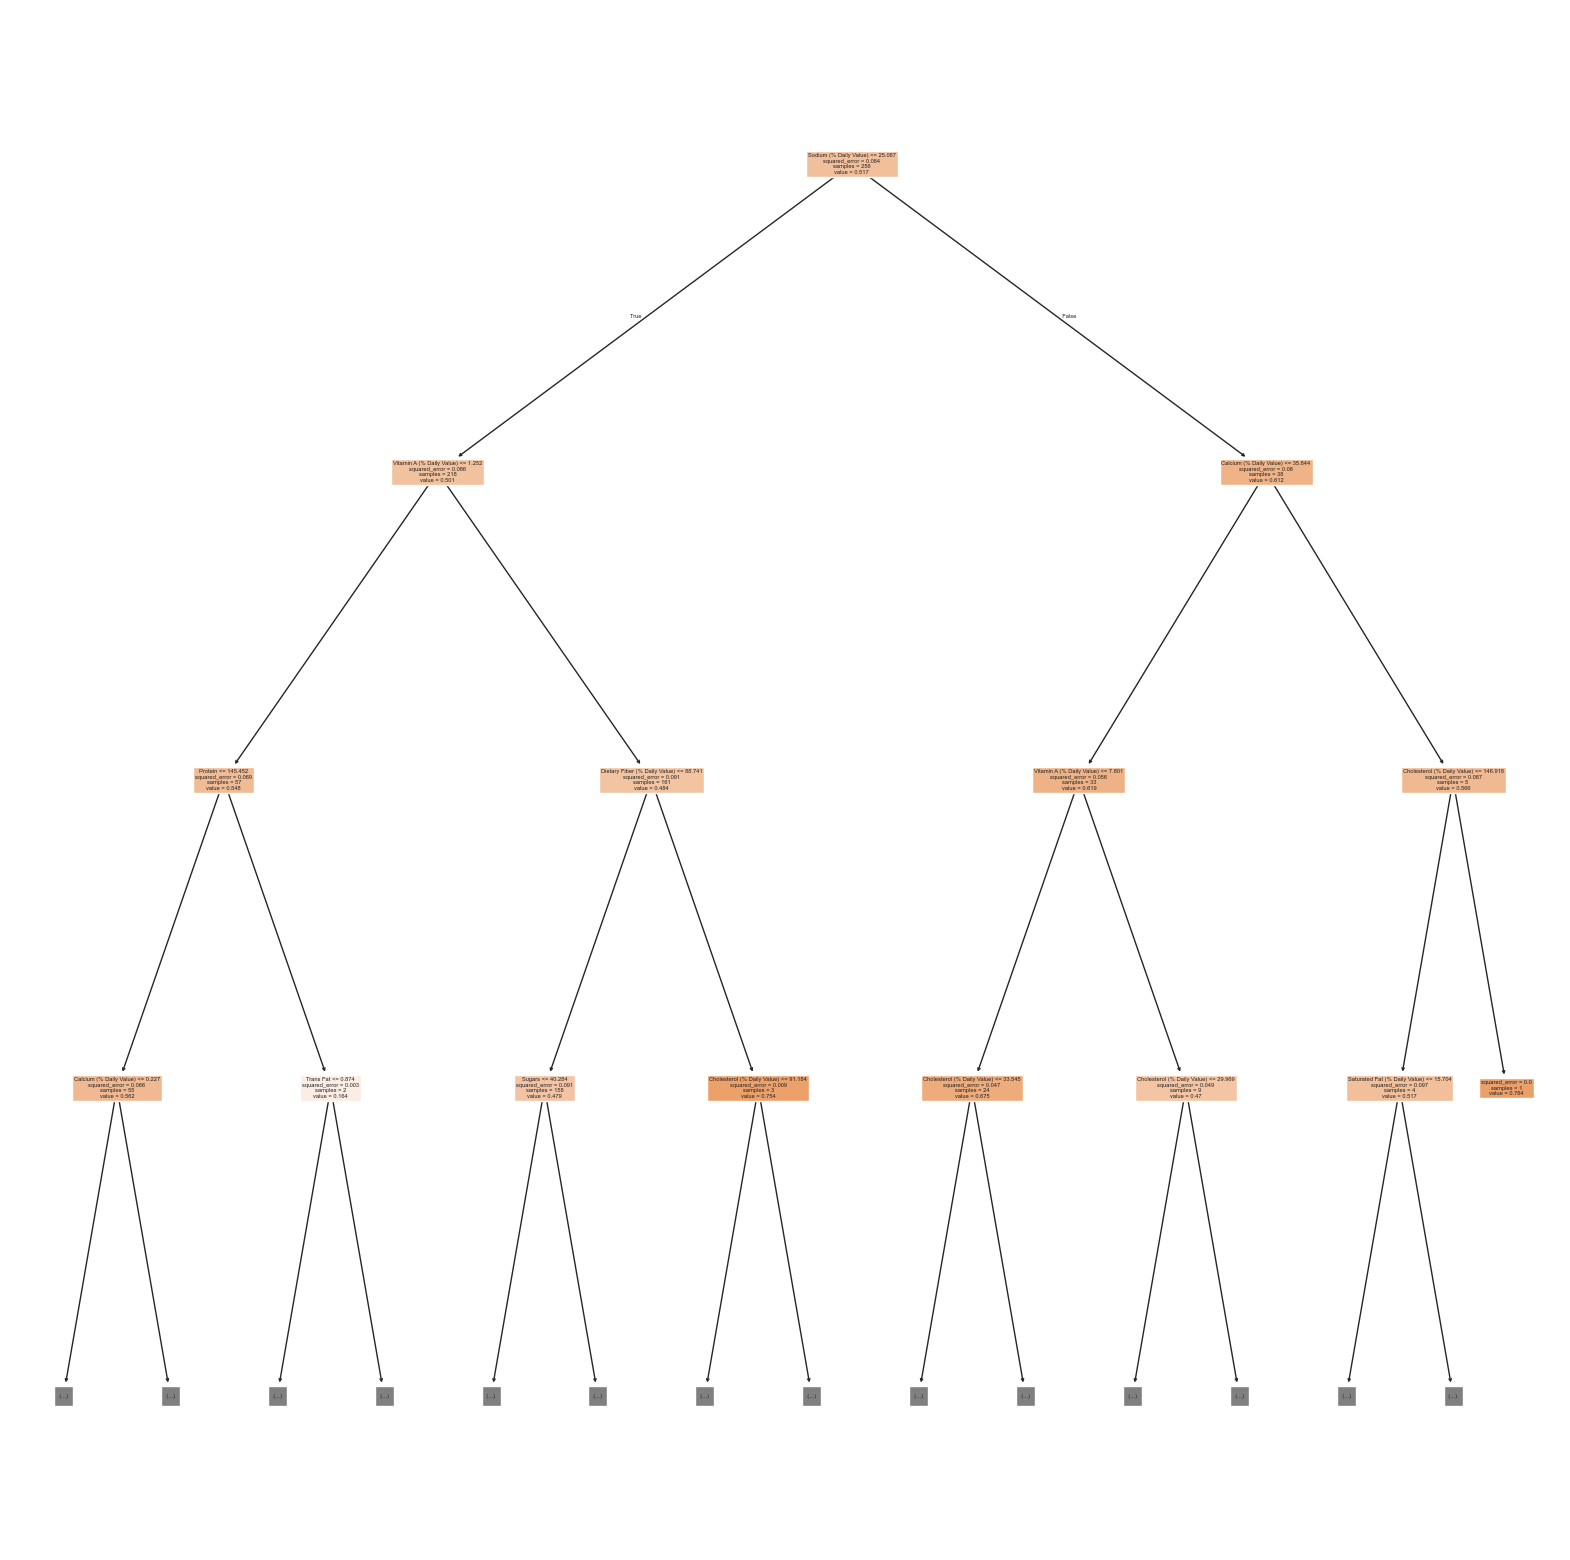

In [41]:


# Convert feature names to a list
feature_names_list = list(menu_details.columns)

# Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree,
          max_depth=3,
          filled=True,
          feature_names=[
              'Saturated Fat (% Daily Value)', 'Trans Fat',
              'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)',
              'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)',
              'Sugars', 'Protein', 'Vitamin A (% Daily Value)',
              'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
              'Iron (% Daily Value)'
          ])
plt.show()

In [42]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message="X has feature names, but .* was fitted without feature names")


<span style='font-size:x-large'>Graph Outliers vs Inliers:</span>

<span style='font-size:medium'>By plotting 2 different graphs of both Outliers and Inliers, we can detect the number of anomalies through a better visualisation, and remove the anomalies thereafter. </span>


Number of anomalous values: 45
Number of non-anomalous values: 215
Total Number of Values: 260


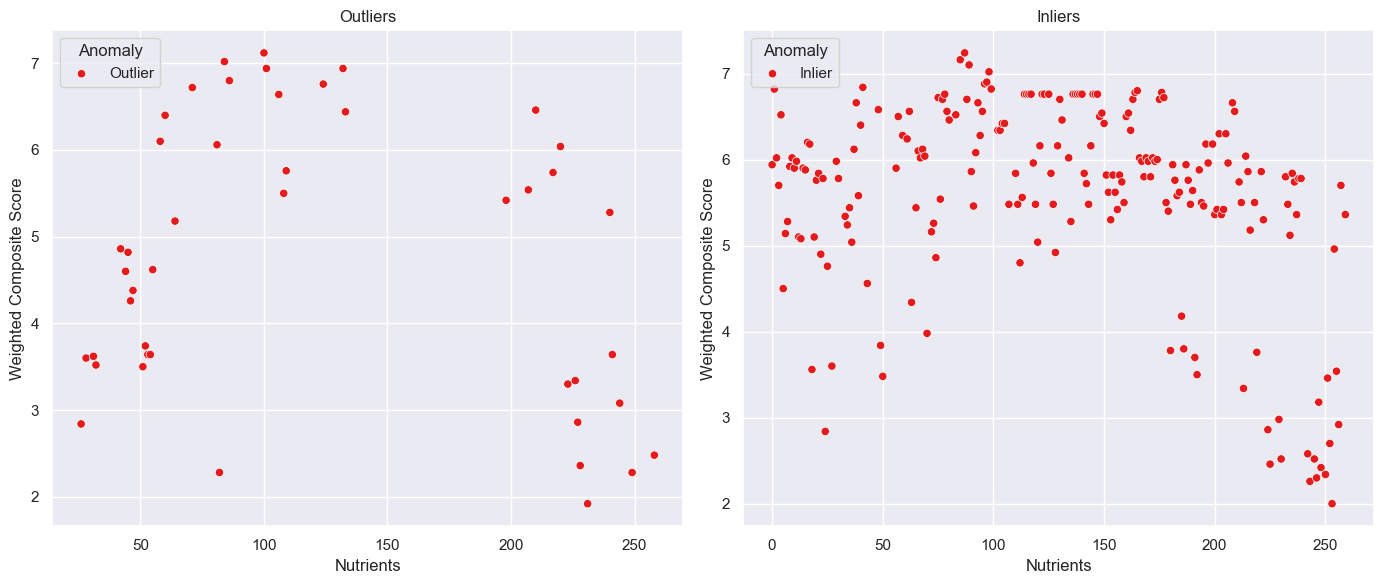

In [43]:
def plot_total_nutrients(df, composite_scores, anomalies_indices):
    anomaly_series = pd.Series(1, index=df.index)
    anomaly_series.loc[anomalies_indices] = -1

    df_copy = df.copy()

    df_copy['Anomaly'] = anomaly_series
    df_copy['Weighted Composite Score'] = composite_scores

    total_anomalies = len(anomalies_indices)
    total_inliers = len(df_copy) - total_anomalies
    total_points = len(df_copy)
    print(f"Number of anomalous values: {total_anomalies}")
    print(f"Number of non-anomalous values: {total_inliers}")
    print(f"Total Number of Values: {total_points}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    outliers = df_copy[df_copy['Anomaly'] == -1]
    sb.scatterplot(x=outliers.index,
                   y=outliers['Weighted Composite Score'],
                   hue=outliers['Anomaly'],
                   hue_order=[-1],
                   palette='Set1',
                   ax=axes[0])
    axes[0].set_title('Outliers')
    axes[0].set_xlabel('Nutrients')
    axes[0].set_ylabel('Weighted Composite Score')
    axes[0].legend(title='Anomaly', loc='upper left', labels=['Outlier'])
    axes[0].grid(True)

    inliers = df_copy[df_copy['Anomaly'] == 1]
    sb.scatterplot(x=inliers.index,
                   y=inliers['Weighted Composite Score'],
                   hue=inliers['Anomaly'],
                   hue_order=[1],
                   palette='Set1',
                   ax=axes[1])
    axes[1].set_title('Inliers')
    axes[1].set_xlabel('Nutrients')
    axes[1].set_ylabel('Weighted Composite Score')
    axes[1].legend(title='Anomaly', loc='upper left', labels=['Inlier'])
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_total_nutrients(menu_selected, composite_scores_with_weights,
                     anomalies_indices)

In [44]:
from IPython.display import display


anomalies_indices, anomalies = extract_anomalies(tree, menu_selected)

# Remove anomalies from menu_details
cleaned_menu_details = menu_details.drop(anomalies_indices).reset_index(drop=True)

# Print the cleaned dataset as a table
display(cleaned_menu_details.head(300))



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Serving Size Cleaned,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,136.0,g,2.205882,0.125000,0.227941,0.095588,0.000000,34.0,6.0,5.94
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,135.0,g,1.851852,0.133333,0.222222,0.059259,0.000000,36.0,6.0,6.82
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,111.0,g,3.333333,0.126126,0.261261,0.207207,0.000000,28.0,4.0,6.02
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,161.0,g,2.795031,0.130435,0.186335,0.173913,0.000000,42.0,4.0,5.70
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,161.0,g,2.484472,0.130435,0.186335,0.142857,0.000000,42.0,4.0,6.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Smoothies & Shakes,McFlurry with M&M’s Candies (Snack),7.3 oz (207 g),430,140,15.0,24,10.0,48,0.0,...,207.0,g,2.077295,0.043478,0.309179,0.072464,0.000000,18.0,118.0,4.96
211,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,285.0,g,1.789474,0.042105,0.280702,0.059649,22.727273,24.0,128.0,3.54
212,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,381.0,g,1.811024,0.039370,0.278215,0.060367,45.454545,30.0,170.0,2.92
213,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,190.0,g,1.789474,0.042105,0.278947,0.057895,0.000000,16.0,86.0,5.70


<span style='font-size:x-large'>After detecting the anomalies, we are able to clean the data to provide a more accurate dataset by removing all the outliers, hence obtain a more accurate output.</span>


# Multivariate Linear Regression Model
---
Jump to [Table of Contents](#table-of-contents)

Let's start by setting up a Multi-Variate Linear Regression problem.   

Response Variable : **Composite Scores**     
Predictor Feature : **Carbohydrates, Protein, Sodium, Trans Fat, Sugars, Saturated Fat, Vitamin A, Vitamin C, Dietary Fibre, Iron, Cholesterol, Calcium**  (Macros and Micros)

> Regression Model : Composite Scores = $a_1$ $\times$ Carbohydrates + $a_2$ $\times$ Protein + $a_3$ $\times$ Sodium + $a_4$ $\times$ Trans Fat + $a_5$ $\times$ Sugars + $a_6$ $\times$  Saturated Fat + $a_7$ $\times$ Vitamin A + $a_8$ $\times$ Vitamin C + $a_9$ $\times$ Dietary Fibre + $a_{10}$ $\times$ Iron + $a_{11}$ $\times$ Cholesterol + $a_{12}$ $\times$ Calcium + $b$  



Intercept of Regression 	: b =  6.699425715323249
Coefficients of Regression 	: a =  [ 0.00793476  0.01703569 -0.01745256 -0.04317967 -0.01289035 -0.00416965
  0.00372096  0.00046839  0.01846702 -0.03108279 -0.00794496 -0.00150485]

                       Predictors  Coefficients
0   Carbohydrates (% Daily Value)      0.007935
1         Protein (% Daily Value)      0.017036
2          Sodium (% Daily Value)     -0.017453
3       Trans Fat (% Daily Value)     -0.043180
4          Sugars (% Daily Value)     -0.012890
5   Saturated Fat (% Daily Value)     -0.004170
6       Vitamin A (% Daily Value)      0.003721
7       Vitamin C (% Daily Value)      0.000468
8   Dietary Fiber (% Daily Value)      0.018467
9            Iron (% Daily Value)     -0.031083
10    Cholesterol (% Daily Value)     -0.007945
11        Calcium (% Daily Value)     -0.001505



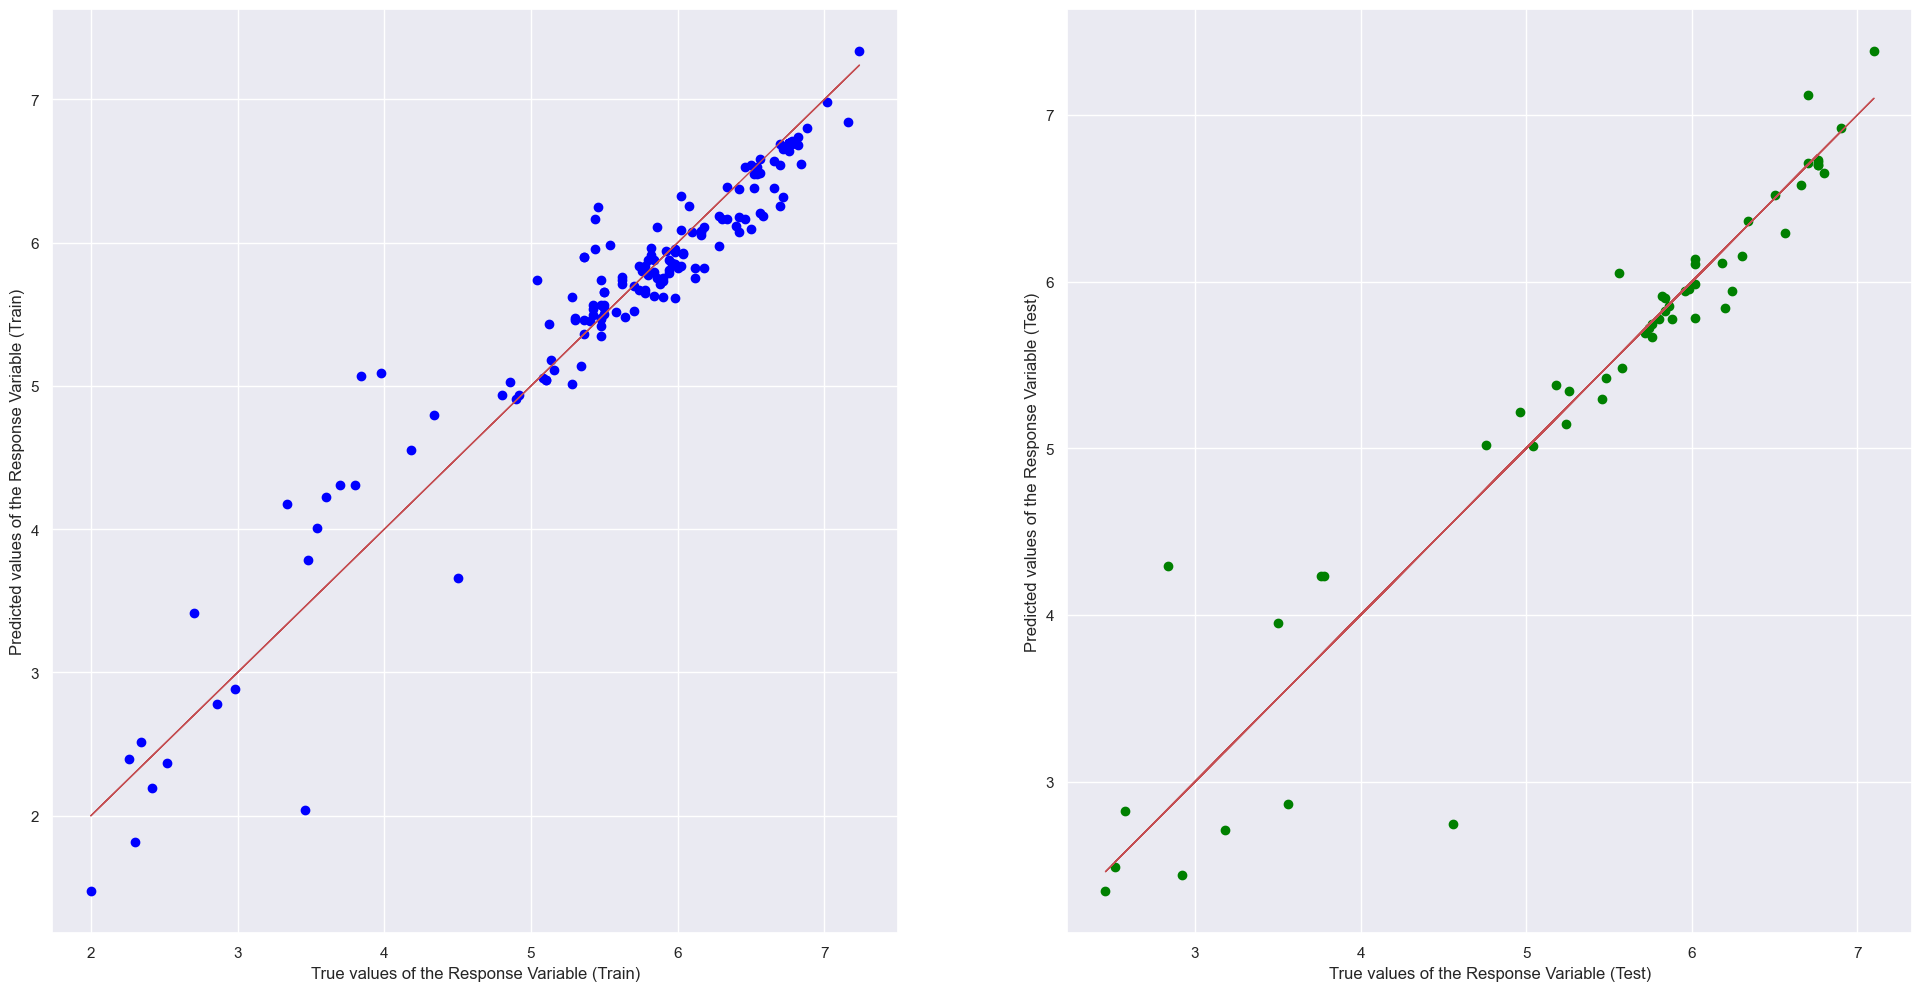

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9209852542289428
Mean Squared Error (MSE) 	: 0.09549374241978296

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9039174726452195
Mean Squared Error (MSE) 	: 0.1526335661051169



In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract features and target variable
X = cleaned_menu_details[nutrients]
y = cleaned_menu_details['Weighted Composite Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_)), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Metrics: Explained Variance and Mean Squared Error

As we can see from above, the explained variance for the train dataset is very close to 1, thus, the goodness of fit of the model can be said to be very good. Additionally, the MSE is generally considered not too high as well, thus, Prediction Accuracy of the model on the Test set is high.

Thus, this shows that the linear regression model using the macronutrients and micronutrients of the food/drinks is robust and reliable in predicting the Composite scores. This leads to better and more accurate recommendations for the user when applied in real life scenarios. The model effectively reducing risks of obesity and improving the health of customers by helping make better and healthier decisions when dining in.

Now, let's look at the coefficients of the predictors of the linear regression model.

We can tell that Trans Fats has the largest effect on the weighted composite score followed by Sodium then Dietary Fibre and Protein accordingly due to the relatively large magnitudes of the coefficients of these predictors as seen from the linear regression model.

The predicted coefficients for the factor of Trans Fat and Protein is consistent with weights allocated while Sodium and Dietary Fibre is predicted to be slightly higher than allocated.

# Gradient Boosting Machine

---

Jump to [Table of Contents](#table-of-contents)

## GBM used will be LightGBM.

Boosted Gradient Machines are a class of machine learning algorithms that involves the gradient boosting techniques, used for regression and classification tasks. It works by combining multiple weak learners sequentially, where each new learner corrects the errors made by previous ones.

objective: This defines the learning task and the corresponding learning objective. For regression tasks, typical objectives include regression, regression\_l1, huber, fair, etc. The regression objective used here is for least squares regression.

metric: Specifies the loss or performance metric to be used for model evaluation. The rmse \(root mean squared error\) is a common metric for regression problems, measuring the average magnitude of the errors in a set of predictions, without considering their direction.

num\_leaves: The maximum number of leaves \(terminal nodes\) in one tree. Having more leaves will increase the model complexity and can lead to overfitting. The default value is 31, but this should be tuned based on the specific dataset and complexity of the problem.

learning\_rate: Also known as the shrinkage rate, this parameter controls the step size at each iteration while moving toward a minimum of the loss function. A smaller learning rate requires more boosting rounds to achieve the same reduction in residual error as a larger learning rate.

n\_estimators: The number of boosting iterations to be run. This is essentially the number of trees to use in the model. More trees can lead to better performance, but also higher risk of overfitting.

max\_depth: The maximum depth of a tree. \-1 signifies no limit, although specifying a value can help in controlling overfitting.

lambda\_l1: L1 regularization term on weights \(equivalent to Lasso regression\). It encourages sparsity in the output model \(i.e., using fewer features\). This can be tuned using cross\-validation.

lambda\_l2: L2 regularization term on weights \(equivalent to Ridge regression\). It encourages smaller and more diffused weight values, which can help to improve model robustness and prevent overfitting. This can also be tuned using cross\-validation.

feature\_fraction: This parameter controls the fraction of features to be used for each iteration \(tree\). This is similar to feature subsampling, and using a value less than 1 can lead to faster training and can also help in controlling overfitting.

bagging\_fraction: Also known as subsample, this parameter defines the fraction of data to be used for each iteration. This is a form of data subsampling that helps in accelerating training and reducing overfitting.

bagging\_freq: Frequency for bagging. 0 means disable bagging; k means perform bagging at every k iteration. Must be used with bagging\_fraction. This helps in reducing overfitting and can make the model more robust by introducing randomness into the data that each tree sees.

## Response will be the weighted composite score and the predictors are all the nutrients that determine healthiness of a food item but in percentage of daily value.



In [46]:
X = cleaned_menu_details[nutrients]
y = cleaned_menu_details['Weighted Composite Score']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
import lightgbm as lgb

In [49]:
# Create a LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Define the parameters for the model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.005,
    'n_estimators': 1000,
    'max_depth': -1,  # No limit, but you can set this to control depth
    'lambda_l1': 0.5,  # Adjust based on validation
    'lambda_l2': 0.5,  # Adjust based on validation
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# Train the model
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=1000
)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 12
[LightGBM] [Info] Start training from score 5.603605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

### Making predictions on the test set and then evaluating the predictions by using RMSE



In [50]:

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE of the predictions: {rmse}")


RMSE of the predictions: 0.2481663798966514


In [51]:

predictions_df = pd.DataFrame({'True Composite Score': y_test, 'Predicted Composite Score': y_pred}).reset_index(drop=True)

predictions_df.head()


,True Composite Score,Predicted Composite Score
0,2.58,2.994464
1,2.92,3.126419
2,5.80,5.403883
3,6.66,6.669433
4,5.88,5.582875


## Let's find the difference, then subsequently the delta between predicted and actual composite score on test

> By showing the highest and lowest delta, it can be determined as to why the LightGBM model managed to do poorly and well for those food items, respectively




In [52]:
predictions_df['difference'] = predictions_df['Predicted Composite Score'] - predictions_df['True Composite Score']
predictions_df.head()


,True Composite Score,Predicted Composite Score,difference
0,2.58,2.994464,0.414464
1,2.92,3.126419,0.206419
2,5.80,5.403883,-0.396117
3,6.66,6.669433,0.009433
4,5.88,5.582875,-0.297125


In [53]:
predictions_df['delta'] = predictions_df['difference'].abs()
predictions_df.head()

,True Composite Score,Predicted Composite Score,difference,delta
0,2.58,2.994464,0.414464,0.414464
1,2.92,3.126419,0.206419,0.206419
2,5.80,5.403883,-0.396117,0.396117
3,6.66,6.669433,0.009433,0.009433
4,5.88,5.582875,-0.297125,0.297125


In [54]:
predictions_df[predictions_df['delta']==predictions_df['delta'].max()].head()

,True Composite Score,Predicted Composite Score,difference,delta
31,5.26,4.579915,-0.680085,0.680085


In [55]:
predictions_df[predictions_df['delta']==predictions_df['delta'].min()].head()

,True Composite Score,Predicted Composite Score,difference,delta
12,5.86,5.859383,-0.000617,0.000617


# Now, using the same trained LightBGM model, let's predict the composite score for each food item in the full database



In [56]:
predicted_values = gbm.predict(cleaned_menu_details[nutrients], num_iteration=gbm.best_iteration)

In [57]:
cleaned_menu_details['Predicted Composite Score'] = pd.DataFrame(predicted_values).reset_index(drop=True)

cleaned_menu_details.head()

# cleaned_menu_details.to_csv('lightgbm_output.csv', index=False)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score,Predicted Composite Score
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,g,2.205882,0.125000,0.227941,0.095588,0.0,34.0,6.0,5.94,6.204546
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,g,1.851852,0.133333,0.222222,0.059259,0.0,36.0,6.0,6.82,6.709227
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,g,3.333333,0.126126,0.261261,0.207207,0.0,28.0,4.0,6.02,6.306545
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,g,2.795031,0.130435,0.186335,0.173913,0.0,42.0,4.0,5.70,5.691319
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,g,2.484472,0.130435,0.186335,0.142857,0.0,42.0,4.0,6.52,6.437873


### As given in the weighted composite score earlier on, Premium Southwest Salad with Grilled chicken was the healthiest food item in the whole menu. Let's see if that is still true:



In [58]:
cleaned_menu_details[cleaned_menu_details['Predicted Composite Score']==cleaned_menu_details['Predicted Composite Score'].max()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score,Predicted Composite Score
65,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),140,40,4.5,7,2.0,9,0.0,...,g,0.608696,0.026087,0.086957,0.019565,0.0,12.0,12.0,7.24,6.995946


## Given in the actual weighted composite score earlier on, Frappe Chocolate Chip \(Large\) was the unhealthiest food item in the whole menu. Let's check if that is still true.



In [59]:
cleaned_menu_details[cleaned_menu_details['Predicted Composite Score']==cleaned_menu_details['Predicted Composite Score'].min()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Unit,Calories Density,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score,Predicted Composite Score
201,Smoothies & Shakes,Vanilla Shake (Large),22 fl oz cup,820,210,23.0,35,15.0,73,1.0,...,ml,1.260342,0.027666,0.207495,0.035351,45.454545,36.0,202.0,2.26,2.977487
202,Smoothies & Shakes,Strawberry Shake (Medium),16 fl oz cup,690,180,20.0,30,13.0,63,1.0,...,ml,1.458231,0.031701,0.240925,0.042268,45.454545,30.0,200.0,2.52,2.977487
203,Smoothies & Shakes,Strawberry Shake (Large),22 fl oz cup,850,210,24.0,36,15.0,75,1.0,...,ml,1.306452,0.027666,0.215180,0.036888,45.454545,36.0,246.0,2.30,2.977487
207,Smoothies & Shakes,Shamrock Shake (Large),22 fl oz cup,820,210,23.0,35,15.0,73,1.0,...,ml,1.260342,0.027666,0.207495,0.035351,45.454545,36.0,230.0,3.46,2.977487


### Let's find out what is the predicted healthiest food item in each category



In [60]:
highest_scoring_items = cleaned_menu_details.loc[cleaned_menu_details.groupby('Category')['Predicted Composite Score'].idxmax()]

In [61]:
import plotly.express as px

# Create a bar chart
fig = px.bar(highest_scoring_items,
             x='Category',
             y='Predicted Composite Score',
             text='Predicted Composite Score',
             color='Item',  # Color codes bars by item name
             labels={'Composite Score': 'Highest Predicted Composite Score'},
             title='Highest Scoring Food Item in Each Category')

# Improve layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title='Category',
                  yaxis_title='Predicted Composite Score',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide',
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()

### Let's find out what is the predicted unhealthiest food item in each category



In [62]:
lowest_scoring_items = cleaned_menu_details.loc[cleaned_menu_details.groupby('Category')['Predicted Composite Score'].idxmin()]

In [63]:
import plotly.express as px

# Create a bar chart
fig = px.bar(lowest_scoring_items,
             x='Category',
             y='Predicted Composite Score',
             text='Predicted Composite Score',
             color='Item',  # Color codes bars by item name
             labels={'Composite Score': 'Lowest Predicted Composite Score'},
             title='Lowest Scoring Food Item in Each Category')

# Improve layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title='Category',
                  yaxis_title='Predicted Composite Score',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide',
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()

## Let's find the difference and subsequently the delta between predicted and actual composite score to see which food items were predicted badly or good respectively



In [64]:
cleaned_menu_details['score difference'] = cleaned_menu_details['Predicted Composite Score'] - cleaned_menu_details['Weighted Composite Score']
cleaned_menu_details['delta'] = cleaned_menu_details['score difference'].abs()

In [65]:
cleaned_menu_details[cleaned_menu_details['delta']==cleaned_menu_details['delta'].max()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score,Predicted Composite Score,score difference,delta
26,Breakfast,Big Breakfast (Regular Biscuit),9.5 oz (269 g),740,430,48.0,73,17.0,87,0.0,...,0.104089,0.189591,0.178439,0.0,56.0,6.0,3.6,5.086215,1.486215,1.486215


In [66]:
cleaned_menu_details[cleaned_menu_details['delta']==cleaned_menu_details['delta'].min()].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Protein Density,Carbohydrates Density,Total Fat Density,Trans Fat (% Daily Value),Protein (% Daily Value),Sugars (% Daily Value),Weighted Composite Score,Predicted Composite Score,score difference,delta
35,Breakfast,Cinnamon Melts,4 oz (114 g),460,170,19.0,30,9.0,43,0.0,...,0.052632,0.578947,0.166667,0.0,12.0,64.0,5.58,5.58028,0.00028,0.00028


## Let's plot the comparison between actual and predicted composite score:



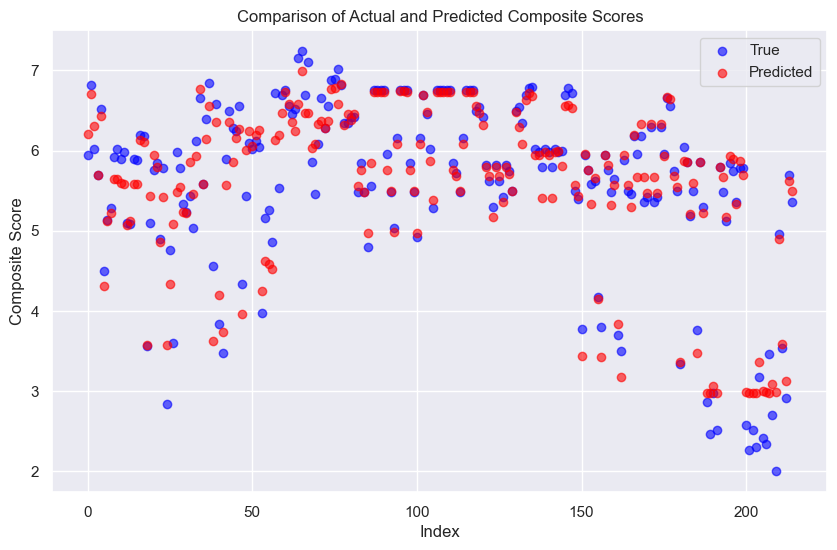

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_menu_details.index, cleaned_menu_details['Weighted Composite Score'], color='blue', label='True', alpha=0.6)
plt.scatter(cleaned_menu_details.index, cleaned_menu_details['Predicted Composite Score'], color='red', label='Predicted', alpha=0.6)
plt.title('Comparison of Actual and Predicted Composite Scores')
plt.xlabel('Index')
plt.ylabel('Composite Score')
plt.legend()
plt.show()


### It can be seen that in the area where there is more data, the prediction is much closer to actual than in areas where there is points sparsely spread out, which makes sense as the AI model has more clustered data to accurately distinguish the differences between food items and predict accordingly.



## Let's now find out in what order of priority the LightGBM model gave to each of the 12 variables, when making the prediction of weighted composite score

This is done by checking which variable lead to more splits and gain


In [68]:

feature_importances = gbm.feature_importance(importance_type='split')
feature_names = gbm.feature_name()



feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})


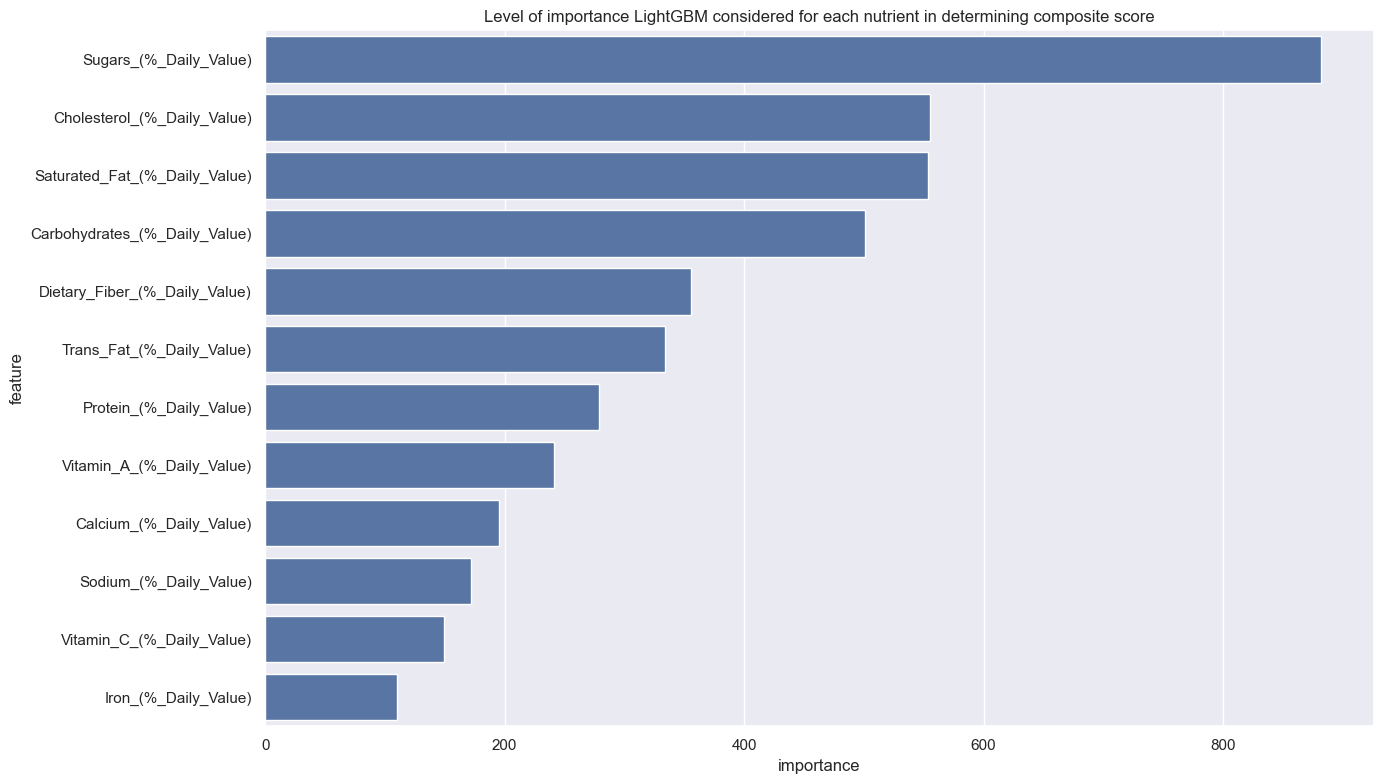

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


sorted_features = feature_importance_df.sort_values(by='importance', ascending=False)


top_n_features = sorted_features.head(12)

plt.figure(figsize=(14, 8))
sns.barplot(x='importance', y='feature', data=top_n_features)
plt.title('Level of importance LightGBM considered for each nutrient in determining composite score')
plt.tight_layout()
plt.show()



    Nutrient Weights:
    
    'Trans Fat (% Daily Value)': 0.14,
    'Sugars (% Daily Value)': 0.12,
    'Protein (% Daily Value)': 0.10,
    'Sodium (% Daily Value)': 0.10,
    'Saturated Fat (% Daily Value)': 0.10,
    'Cholesterol (% Daily Value)': 0.10,
    'Carbohydrates (% Daily Value)': 0.08,
    'Dietary Fiber (% Daily Value)': 0.08,
    'Vitamin A (% Daily Value)': 0.06,  
    'Vitamin C (% Daily Value)': 0.06,
    'Calcium (% Daily Value)': 0.04,  
    'Iron (% Daily Value)': 0.02,


## It can be seen that the LightGBM predicted the composite score based on a different scale of varying importance for the 12 predictor variables, in comparison to the weights that was assigned when feature engineering the weighted composite score earlier on

## Let's now compare between the actual weighted composite score and predicted score and deduce which one has a more competitive and harsher scoring system.

Having a more competitive and harsher scoring system is ideal as it ensures there is larger and stark differences between the datapoints, allowing for a more decisive and compelling outcome. In this case, having a more rigorous scoring system, the customer will be able to identify and distinguish between more food items, leading to a more informed decision in choosing a food item, hence decreasing risk of obesity. While this is just predicted weighted score, which might not be entirely accurate, the trained AI model helps to shed light on how to further differentiate between food items and its nutrients, by analysing the level of importance the LightGBM model gave to each nutrient against the actual weights allocated.


### Number of unique values of actual and predicted weighted composite score after removal of outliers, using isolation forest

In [70]:
unique_count_actualWCS = len(cleaned_menu_details['Weighted Composite Score'].unique())
print(unique_count_actualWCS)

144


In [71]:
unique_count_predWCS = len(cleaned_menu_details['Predicted Composite Score'].unique())
print(unique_count_predWCS)



185


## Number of unique values of predicted weighted composite score is more than actual one



## Hence, it can be deduced that the LightGBM model's predicted composite scoring system is much more competitive and harsher. This ensures there is more variability in weighted composite score.

